In [58]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

In [2]:
df = pd.read_csv("car_sales_data.csv") #loading file

In [3]:
df.head()           #data preprocessing - viewing the data

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
df.isnull().any()                       #data preprocessing - checking for null values

Manufacturer           False
Model                  False
Engine size            False
Fuel type              False
Year of manufacture    False
Mileage                False
Price                  False
dtype: bool

In [5]:
df.describe                                    #data preprocessing - checking data attributes

<bound method NDFrame.describe of       Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0             Ford      Fiesta          1.0    Petrol                 2002   
1          Porsche  718 Cayman          4.0    Petrol                 2016   
2             Ford      Mondeo          1.6    Diesel                 2014   
3           Toyota        RAV4          1.8    Hybrid                 1988   
4               VW        Polo          1.0    Petrol                 2006   
...            ...         ...          ...       ...                  ...   
49995          BMW          M5          5.0    Petrol                 2018   
49996       Toyota       Prius          1.8    Hybrid                 2003   
49997         Ford      Mondeo          1.6    Diesel                 2022   
49998         Ford       Focus          1.0    Diesel                 2016   
49999           VW        Golf          1.4    Diesel                 2012   

       Mileage   Price  
0   

<Axes: xlabel='Price', ylabel='Count'>

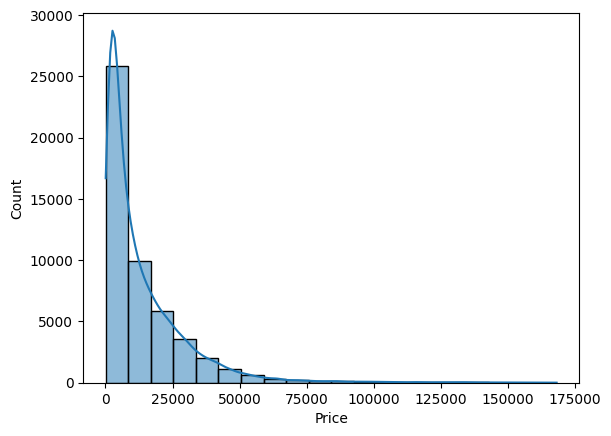

In [6]:
#Exploratory Data Analysis

sns.histplot(df['Price'], bins = 20, kde = True)

### Checking how Price varies with the numerical variables Mileage,Engine size, and Year of manufacture

### Mileage vs Price

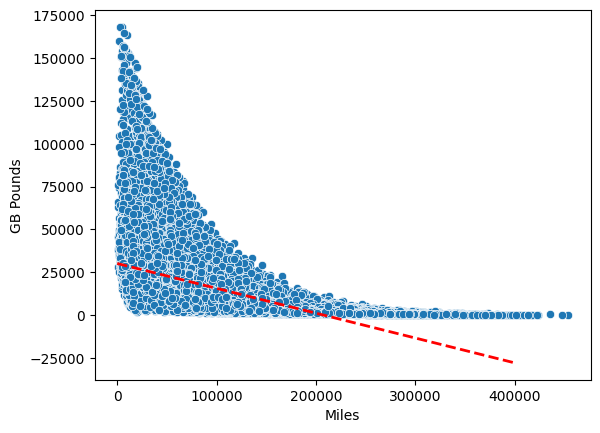

In [17]:
# Create a scatter plot of Price vs Miles

sns.scatterplot(data = df, x = "Mileage", y = "Price")
# Label both axes
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
plt.xlabel("Miles")
plt.ylabel("GB Pounds")
plt.savefig('Mileage vs Price.png', dpi=300)
# Show the figure
plt.show()



### Checking how Price varies with the numerical variables Mileage,Engine size, and Year of manufacture


### Price vs Engine size

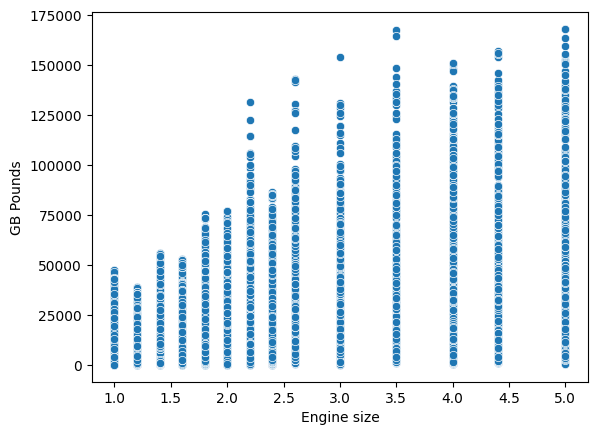

In [26]:
# Creating a scatter plot of Price vs Engine size

sns.scatterplot(data = df, y = "Price", x= "Engine size")
# Label both axes


plt.xlabel("Engine size")
plt.ylabel("GB Pounds")
plt.savefig('Engine size vs Price.png', dpi=300)
# Show the figure
plt.show()

### Price vs Year of manufacture


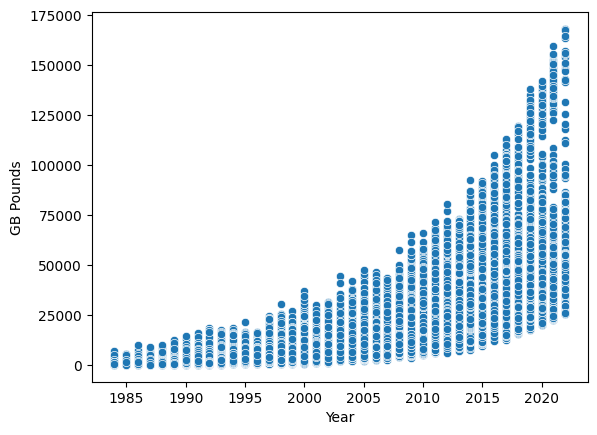

In [9]:
# Creating a scatter plot of Price vs Year of manufacture

sns.scatterplot(data = df, x = "Year of manufacture", y = "Price")
# Label both axes
plt.xlabel("Year")
plt.ylabel("GB Pounds")
plt.savefig('Year of manufacture vs Price.png', dpi=300)
# Show the figure
plt.show()

###  Checking variables to use to calculate the correlation coefficients.

<Axes: >

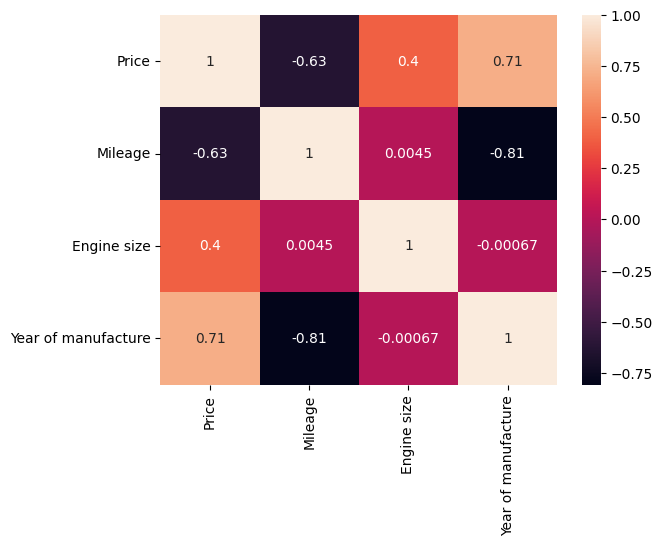

In [10]:
# Checking variables to use to calculate the correlation coefficients.

column_list = ["Price", "Mileage", "Engine size", "Year of manufacture"]

# Calculate the correlation coefficients, and then plot them using Seaborn's heatmap() function

sns.heatmap(df[column_list].corr(), annot = True)

### Positive values indicate positive correlations, negative values indicate negative correlations. In this case, the strongest correlation is between Price and Mileage with a negative correlation (-0.63)

### Building A Simple Linear Regression Model Using the Numeric Columns:
### i) Mileage

In [11]:

x = df["Mileage"]        # Extract the input feature

y = df["Price"]           # Extract the output feature

# Converting x to a numpy array and re-shaping it to 2 dimensions.
x = x.to_numpy().reshape(-1, 1)


# Splitting the x and y arrays between the train and test sets. I
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Confirming the size of the size of the training and testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))



There are 40000 data points in the training set.
There are 10000 data points in the testing set.


In [12]:

scale = StandardScaler() # Create an instance of the StandardScaler class

# Fiting the standard scaler to the input data that we have in x to find the mean and standard deviation in x, using the 
#training dataset.

scale.fit(x_train)

# Applying the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


price_linear = LinearRegression() # Creating an instance of the model.

price_linear.fit(x_train_scaled, y_train) # Fitting the model to the training data.


gradient = price_linear.coef_[0] # Get the fit coefficients from the best-fit model.
intercept = price_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)



gradient:  -10374.075445707327
intercept:  13854.6287


In [13]:
# Use the trained model to predict the # outputs (price) for countries in the testing dataset.
price_pred = price_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  7964.78467002469
Mean squared error:  162468566.87254104
Root mean squared error:  12746.315815659875
R2:  0.4013139100884707


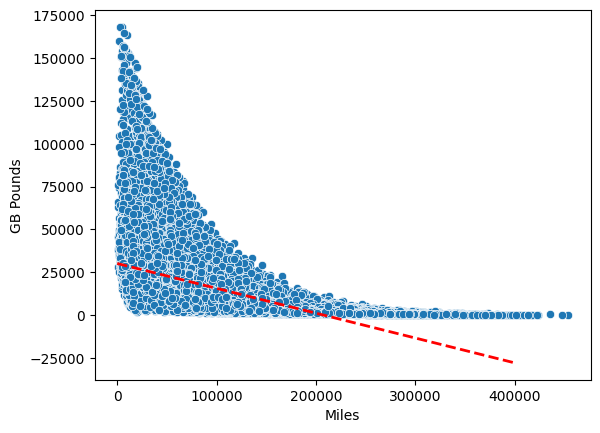

In [27]:
# Create an array of values covering the range of Mileage that we found in the dataset

x_fit = np.arange(0, 400000, 1).reshape(-1, 1)

# Applying the standardisation transformation using the same StandardScaler used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Applying the trained model to this scaled input array to getthe y-values for the best-fit line.
y_fit = price_linear.predict(x_fit_scaled)

# Using seaborn to create a scatter plot of Price v Mileage
sns.scatterplot(data = df, x = "Mileage", y = "Price")

# Plot the best-fit line from the trained model
#plt.plot(x_fit, y_fit)
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
# Label the axes
plt.xlabel("Miles")
plt.ylabel("GB Pounds")
plt.savefig('SimpReg_Mileage vs Price.png', dpi=300)
# Show the plot
plt.show()



### ii) Engine Size

In [28]:
x = df["Engine size"]  # Extract the input feature

y = df["Price"] # Extract the output feature

# The sklearn models the input, x, to be in the form of a 2-dimensional arraywe will be using expect. We convert x to a numpy 
# array and re-shape it so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)



# split the x and y arrays 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# confirming size of train and test sets
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))


# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fitting the standard scaler to the input data to find the mean and standard deviation in x,using the training dataset.
scale.fit(x_train)

# Applying the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


# Create an instance of the model.
price_linear = LinearRegression()

# Fit the model to the training data.
price_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = price_linear.coef_[0]
intercept = price_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)


# Use the trained model to predict the outputs (Price) in the testing dataset.
price_pred = price_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

There are 40000 data points in the training set.
There are 10000 data points in the testing set.
gradient:  6575.659995991372
intercept:  13854.6287
Mean absolute error:  10817.491562557909
Mean squared error:  230499154.45279127
Root mean squared error:  15182.198604049128
R2:  0.15062562461380213


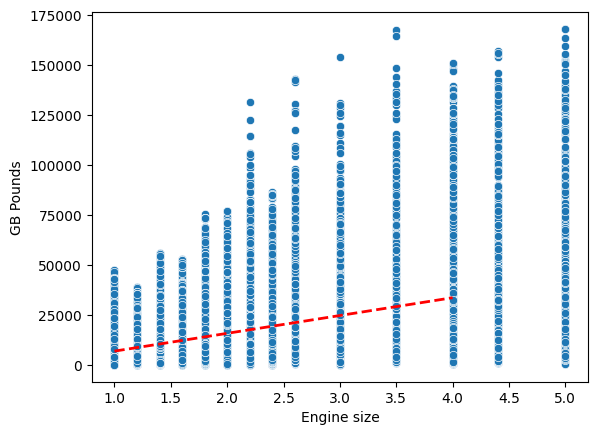

In [30]:
x_fit = np.arange(1, 5, 1).reshape(-1, 1)
# Apply the standardisation transformation using
# the same StandardScaler that we used on the
# training and testing data.
x_fit_scaled = scale.transform(x_fit)
# Apply the trained model to this scaled input array.
# This will give us the y-values for the best-fit line.
y_fit = price_linear.predict(x_fit_scaled)
# Use seaborn to create a scatter plot of Life expectancy
# versus GDP
sns.scatterplot(data = df, x = "Engine size", y = "Price")
# Plot the best-fit line from
# the trained model
#plt.plot(x_fit, y_fit)
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
# Label both axes
plt.xlabel("Engine size")
plt.ylabel("GB Pounds")
plt.savefig('SimpReg_Engine vs Price.png', dpi=300)
# Show the plot
plt.show()

### iii) Year of Manufacture

In [31]:

x = df["Year of manufacture"]      # Extract the input feature

y = df["Price"]                    # Extract the output feature

# The sklearn models expect the input to be in the form of a 2-dimensional array. Convert  and re-shape x to 2 dimensions.
x = x.to_numpy().reshape(-1, 1)


# We can now split the x and y arrays between the train and test sets. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Confirming the size of the training and testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))


# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data in x to find the mean and standard deviation in x, using the training dataset.
scale.fit(x_train)

# Apply the standard scaler transformation to the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

price_linear = LinearRegression()  # Create an instance of the model.

price_linear.fit(x_train_scaled, y_train)  # Fit the model to the training data.

# Get the fit coefficients from the best-fit model.
gradient = price_linear.coef_[0]
intercept = price_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)


# Use the trained model to predict the outputs (Price)
price_pred = price_linear.predict(x_test_scaled)


mean_abs = mean_absolute_error(y_test, price_pred) # Calculate the mean absolute error

mean_squared = mean_squared_error(y_test, price_pred)   # Calculate the mean squared error

rms_error = np.sqrt(mean_squared)

R2 = r2_score(y_test, price_pred)    # Calculate the R2 score

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

There are 40000 data points in the training set.
There are 10000 data points in the testing set.
gradient:  11711.62203633313
intercept:  13854.628699999997
Mean absolute error:  7031.0392086748525
Mean squared error:  132678999.94793083
Root mean squared error:  11518.637069893766
R2:  0.5110865244812856


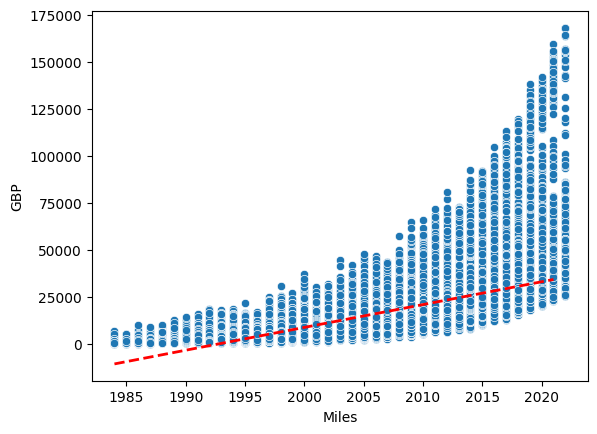

In [32]:
x_fit = np.arange(1984, 2022, 1).reshape(-1, 1)
# Apply the standardisation transformation using
# the same StandardScaler that we used on the
# training and testing data.
x_fit_scaled = scale.transform(x_fit)
# Apply the trained model to this scaled input array.
# This will give us the y-values for the best-fit line.
y_fit = price_linear.predict(x_fit_scaled)
# Use seaborn to create a scatter plot of Life expectancy
# versus GDP
sns.scatterplot(data = df, x = "Year of manufacture", y = "Price")
# Plot the best-fit line from the trained model
#plt.plot(x_fit, y_fit)
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
# Label both axes
plt.xlabel("Miles")
plt.ylabel("GBP")
plt.savefig('SimpReg_Year of man vs Price.png', dpi=300)
# Show the plot
plt.show()

### Building A Simple Polynomial Regression Model Using the Numeric Columns:

### i) Mileage

In [33]:

x = df["Mileage"] # Extract the input feature

y = df["Price"] # Extract the output feature

x = x.to_numpy().reshape(-1, 1)

# Splitting the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

scale = StandardScaler()   # Create an instance of the StandardScaler class

scale.fit(x_train) # Fit the standard scaler to the input data that we have in x_train.

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


# Import the PolynomialFeatures class from the
# sklearn library.
from sklearn.preprocessing import PolynomialFeatures
# Create an instance of the PolynomialFeatures class.
# We can set the degree of the polynomial here, for
# this exercise we are using a degree of 2. We set the
# include_bias parameter to false, this means that we
# don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added
# in later instead, using the intercept.

poly = PolynomialFeatures(degree = 2, include_bias = False)
# Now apply this PolynomialFeatures transformation to
# the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column
# contains the terms for x and the second column contains
# the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
price_poly = LinearRegression()
# Fit the model to the training data.
price_poly.fit(x_poly, y_train)

# Get the fit coefficients from the
# best-fit model.
coefficients = price_poly.coef_
intercept = price_poly.intercept_
# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the price
x_test_poly = poly.fit_transform(x_test_scaled)

price_pred = price_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [-13630.81884183   4476.1506104 ]
intercept:  9378.47808959823
Mean absolute error:  6409.911605271262
Mean squared error:  129620312.1626197
Root mean squared error:  11385.091662460154
R2:  0.5223575898060919


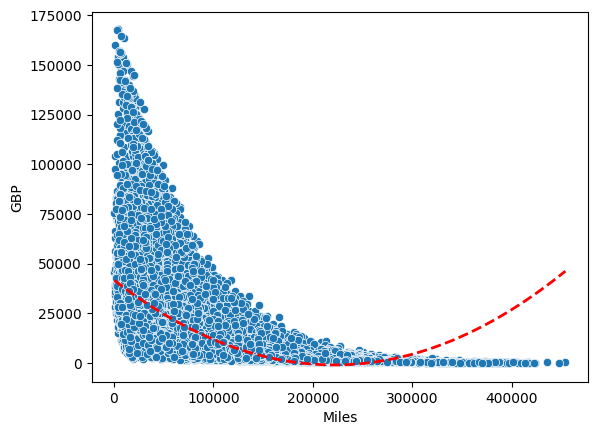

In [35]:
# Create an array of values covering the range price.
x_fit = np.arange(630, 453537, 1).reshape(-1, 1) 

# Apply the standardisation transformation using
# the same StandardScaler that we used on the
# training and testing data.
x_fit_scaled = scale.transform(x_fit)
# Create the polyomial features and apply them
# to the trained model. This will give us the
# y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = price_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Life expectancy
# versus GDP.
sns.scatterplot(data = df, x = "Mileage", y = "Price")
# Plot the best-fit line from
# the trained model
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
# Label both axes
plt.xlabel("Miles")
plt.ylabel("GBP")
plt.savefig('PolyReg_Mileage vs Price.png', dpi=300)
# Show the plot
plt.show()



### ii) Year of Manufacture

In [36]:
# Extract the input feature
x = df["Year of manufacture"]
# Extract the output feature
y = df["Price"]
# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

from sklearn.preprocessing import PolynomialFeatures
# Create an instance of the PolynomialFeatures class.
# set the degree of the polynomial here degree of 2.

poly = PolynomialFeatures(degree = 2, include_bias = False)
# apply this PolynomialFeatures transformation to the scaled input data from the training set. 
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
price_poly = LinearRegression()
# Fit the model to the training data.
price_poly.fit(x_poly, y_train)

# Get the fit coefficients from the best-fit model.
coefficients = price_poly.coef_
intercept = price_poly.intercept_
# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the price

x_test_poly = poly.fit_transform(x_test_scaled)

price_pred = price_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)# Extract the input feature
x = df["Year of manufacture"]
# Extract the output feature
y = df["Price"]
# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree = 2, include_bias = False)
# apply this PolynomialFeatures transformation to  the scaled input data from the training set. 
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
price_poly = LinearRegression()
# Fit the model to the training data.
price_poly.fit(x_poly, y_train)

# Get the fit coefficients from the
# best-fit model.
coefficients = price_poly.coef_
intercept = price_poly.intercept_
# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)



coefficients:  [12065.80671724  5281.89564916]
intercept:  8572.733050839153
Mean absolute error:  5387.109074986994
Mean squared error:  105993894.20194323
Root mean squared error:  10295.33361295025
R2:  0.6094194015754401
coefficients:  [12065.80671724  5281.89564916]
intercept:  8572.733050839153


ValueError: x and y must have same first dimension, but have shapes (38, 1) and (452907,)

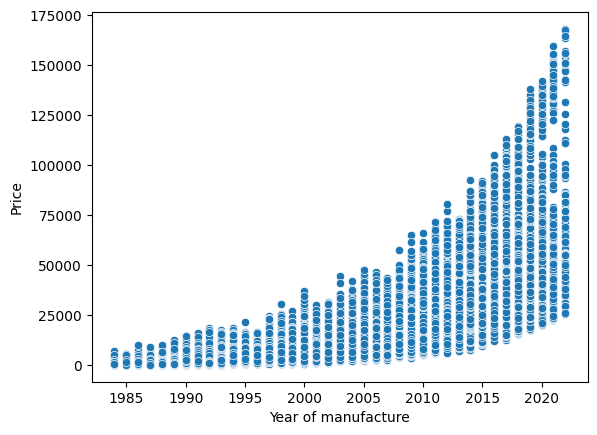

In [39]:
# Create an array of values covering the range of year

x_fit = np.arange(df['Year of manufacture'].min(), 2022, 1).reshape(-1, 1) 

# Apply the standardisation transformation using StandardScaler 
# Create the polyomial features and apply them to the trained model.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = price_poly.predict(x_fit_poly)

# create a scatter plot of Price  v Year of manufacture.
sns.scatterplot(data = df, x = "Year of manufacture", y = "Price")
# Plot the best-fit line from
# the trained model
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
# Label both axes
plt.xlabel("Year")
plt.ylabel("GBP")
plt.savefig('PolyReg_Year of man vs Price.png', dpi=300)
# Show the plot
plt.show()




### iii) Engine size

In [40]:
# Extract the input feature
x = df["Engine size"]
# Extract the output feature
y = df["Price"]
# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the
# sklearn library.
from sklearn.preprocessing import PolynomialFeatures
# Create an instance of the PolynomialFeatures class.
# We can set the degree of the polynomial here, for
# this exercise we are using a degree of 2. We set the
# include_bias parameter to false, this means that we
# don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added
# in later instead, using the intercept.

poly = PolynomialFeatures(degree = 2, include_bias = False)
# Now apply this PolynomialFeatures transformation to
# the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column
# contains the terms for x and the second column contains
# the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
price_poly = LinearRegression()
# Fit the model to the training data.
price_poly.fit(x_poly, y_train)

# Get the fit coefficients from the
# best-fit model.
coefficients = price_poly.coef_
intercept = price_poly.intercept_
# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset. We first need to create
# the polynomial features from the scaled
# inputs features in the testing set, and then
# we can use this with the final trained model
# to get the predicted life expectancies.
x_test_poly = poly.fit_transform(x_test_scaled)

price_pred = price_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)# Extract the input feature


coefficients:  [6079.69940101  238.69551851]
intercept:  13615.933181493827
Mean absolute error:  10807.262347148684
Mean squared error:  230326165.99946904
Root mean squared error:  15176.500452985498
R2:  0.15126307580028653


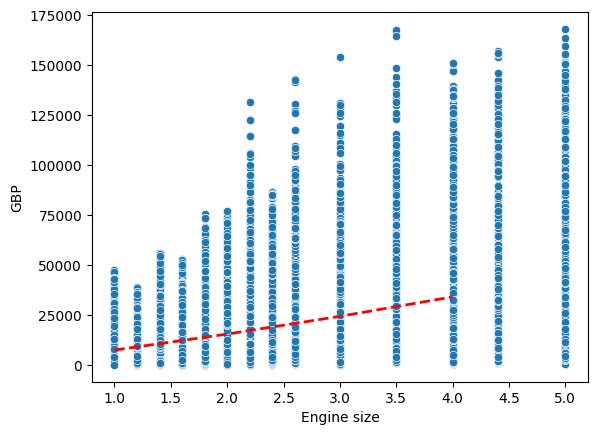

In [42]:
#Create an array of values covering the range
# of GDP that we found in the dataset, i.e.
# from 0 to 70,000.
x_fit = np.arange(1, 5, 1).reshape(-1, 1)
# Apply the standardisation transformation using
# the same StandardScaler that we used on the
# training and testing data.
x_fit_scaled = scale.transform(x_fit)
# Create the polyomial features and apply them
# to the trained model. This will give us the
# y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = price_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Life expectancy
# versus GDP.
sns.scatterplot(data = df, x = "Engine size", y = "Price")
# Plot the best-fit line from
# the trained model
plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
# Label both axes
plt.xlabel("Engine size")
plt.ylabel("GBP")

plt.savefig('PolyReg_Engine size vs Price.png', dpi=300)
# Show the plot
plt.show()

### Multiple Linear Regression

In [90]:
# Extract the input features. Note that we do not
# need to re-shape x in this example, because
# it is already a 2-dimensional array.
feature_names = ["Mileage", "Engine size", "Year of manufacture"]
x = df[feature_names]
# Extract the output feature
y = df["Price"]
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Create an instance of the model
price_linear = LinearRegression()
# Fit the model to the training data.
price_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
intercept = price_linear.intercept_
coefficients = price_linear.coef_
# Print the coefficients.
print("coefficients: ", coefficients)
print("intercept: ", intercept)
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in

# the testing dataset.
price_pred = price_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [-2720.41736808  6594.02448017  9520.41488938]
intercept:  13854.628699999997
Mean absolute error:  6091.45814165624
Mean squared error:  89158615.76017143
Root mean squared error:  9442.38400829851
R2:  0.671456306417368


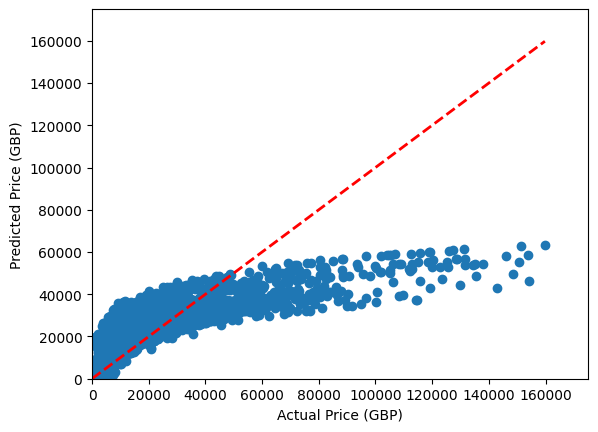

In [91]:
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, price_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
# Limit the range of values on both axes
plt.xlim(0, 175000)
plt.ylim(0, 175000)
plt.savefig('MulitLinearRegression.png', dpi=300)
plt.show()

### Random Forest with Numerical Variables

In [101]:
from sklearn.ensemble import RandomForestRegressor

feature_names = ["Mileage", "Engine size", "Year of manufacture"]
x = df[feature_names]
# Extract the output feature
y = df["Price"]
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Create an instance of the model
price_linear = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data.
price_linear.fit(x_train_scaled, y_train)
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
price_pred = price_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)


Mean absolute error:  2294.4660918988093
Mean squared error:  20159131.522860516
Root mean squared error:  4489.892150470935
R2:  0.9257149129843565


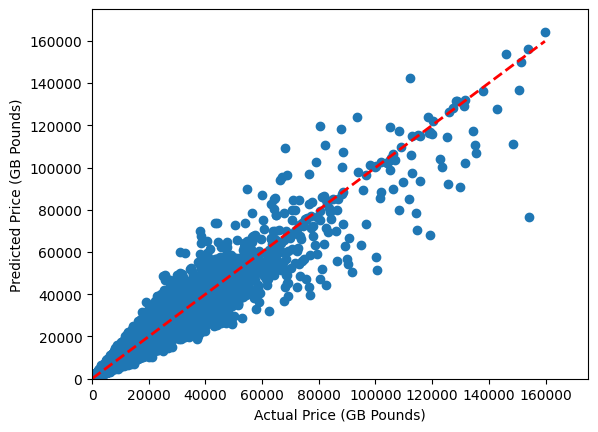

In [102]:
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, price_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
#plt.plot(x_fit, y_fit, linestyle='--', color='red', linewidth=2)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
#plt.plot([0, 175000], [0, 175000], 'k-')
# Label both axes.
plt.xlabel("Actual Price (GB Pounds)")
plt.ylabel("Predicted Price (GB Pounds)")
# Limit the range of values on both axes
plt.xlim(0, 175000)
plt.ylim(0, 175000)
plt.savefig('RandomForestNum.png', dpi=300)
plt.show()


### Random forest: Numeric + Categorical variables

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

# Extract numerical input features from the data frame.
feature_names = ["Engine size", "Year of manufacture", "Mileage"]
x_numerical = df[feature_names]

# Scale the numerical features
scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

In [95]:
feature_names1 = ["Manufacturer", "Model", "Fuel type"]
x_cat = df[feature_names1]

In [96]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
label = LabelEncoder()
for f in feature_names1:
    x_cat[f] = label.fit_transform(x_cat[f])
# Fit the label encode to the categorical data
# in x_cat. This will map each categorical label
# to an integer.

C:\Users\754179\AppData\Local\Temp\ipykernel_1680\2374285588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat[f] = label.fit_transform(x_cat[f])
C:\Users\754179\AppData\Local\Temp\ipykernel_1680\2374285588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat[f] = label.fit_transform(x_cat[f])
C:\Users\754179\AppData\Local\Temp\ipykernel_1680\2374285588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [97]:
# Now we can concatenate the numerical and categorical
# input features into a single array.
x = pd.concat([pd.DataFrame(x_numerical_scaled, columns = feature_names), x_cat[f]], axis = 1)

In [98]:
# Extract the output feature
y = df["Price"]

In [99]:

# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Create an instance of the model
price_linear = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data.
price_linear.fit(x_train_scaled, y_train)
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
price_pred = price_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)


Mean absolute error:  1655.31917695
Mean squared error:  14529057.213402066
Root mean squared error:  3811.7000424222874
R2:  0.9464613702168213


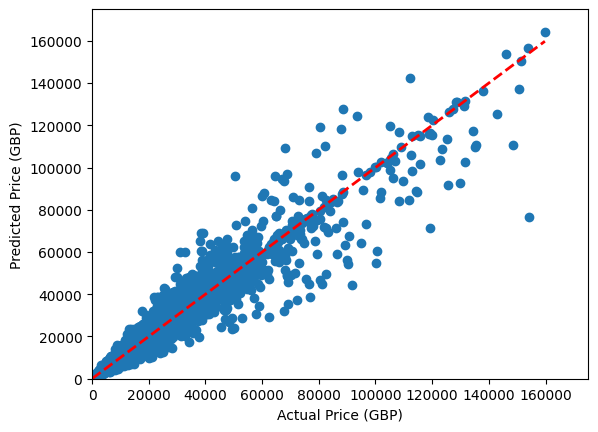

In [100]:
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, price_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
#plt.plot([0, 175000], [0, 175000], 'k-')
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
# Limit the range of values on both axes
plt.xlim(0, 175000)
plt.ylim(0, 175000)
plt.savefig('RandomForest.png', dpi=300)
plt.show()

### Develop an Artificial Neural Network (ANN) model to predict the price of a car 

In [66]:
# Extract the input features.
feature_names = ["Engine size", "Year of manufacture", "Mileage"]
x = df[feature_names]
# Extract the output features.
y = df["Price"]

In [67]:
# Split between train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [68]:

# Create an instance of the MinMaxScaler class
scale = MinMaxScaler()
# Fit the min-max scaler to the input data in x_train.

scale.fit(x_train)

MinMaxScaler()

### ANN Model 1

In [69]:
# re-scale both the training and the testing set in the same way.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [70]:

# creating an instance of the Sequential class.

model = Sequential()


In [71]:
#  add the first hidden layer of the network, which will be a Dense (i.e.# fully connected) layer with 64 neurons (i.e. units) 
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))

# adding a Dropout layer here to help prevent overfitting.
model.add(Dropout(0.2))
# Now add a second hidden layer with 64 units and  the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# create the output layer This will have 1 unit because we are predicting

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:

# using the Adam optimizer with its default parameter choices. 
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

In [73]:


# early stopping criterion, monitor validation Loss, and use  a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 345294976.0000 - mean_squared_error: 345294976.0000 - val_loss: 199168608.0000 - val_mean_squared_error: 199168608.0000
Epoch 2/200
1125/1125 [==============================] - 1s 1ms/step - loss: 180593968.0000 - mean_squared_error: 180593968.0000 - val_loss: 138971632.0000 - val_mean_squared_error: 138971632.0000
Epoch 3/200
1125/1125 [==============================] - 1s 1ms/step - loss: 121504792.0000 - mean_squared_error: 121504792.0000 - val_loss: 87397192.0000 - val_mean_squared_error: 87397192.0000
Epoch 4/200
1125/1125 [==============================] - 1s 1ms/step - loss: 79406424.0000 - mean_squared_error: 79406424.0000 - val_loss: 59467060.0000 - val_mean_squared_error: 59467060.0000
Epoch 5/200
1125/1125 [==============================] - 1s 1ms/step - loss: 59017612.0000 - mean_squared_error: 59017612.0000 - val_loss: 46714804.0000 - val_mean_squared_error: 46714804.0000
Epoch 6/200
1125/1125 [==

313/313 [==============================] - 0s 789us/step


(0.0, 175000.0)

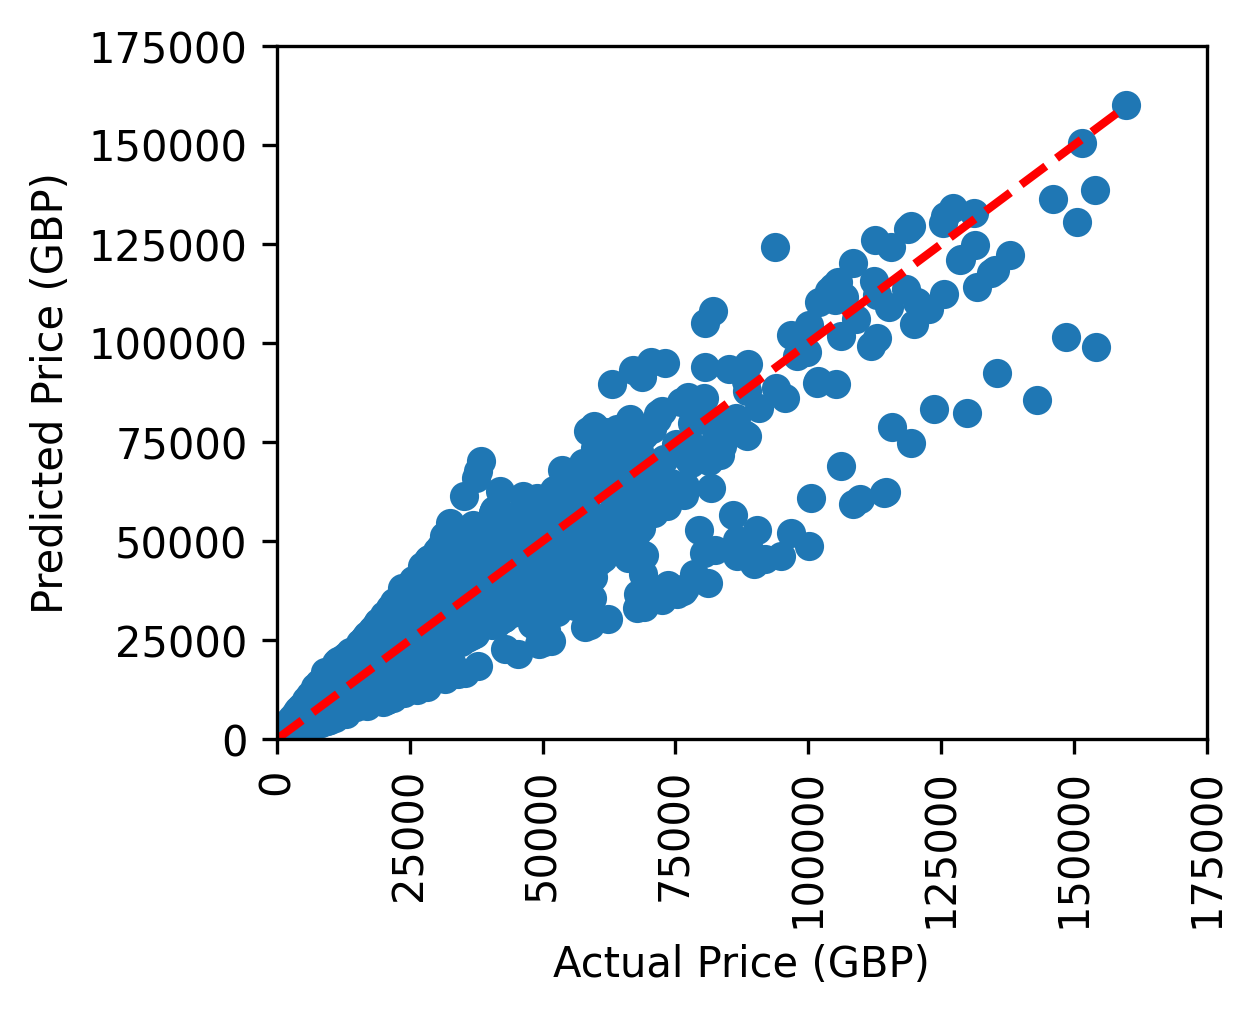

In [74]:
# Predict the model outputs for the testing set.
y_pred = model.predict(x_test_scaled)
# Now use matplotlib to plot the predicted vs actual
# life expectancies.
# Start by creating a figure
plt.figure(figsize = (4, 3), dpi = 300)
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, y_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
# Limit the range of values on both axes
plt.xticks(rotation = 'vertical', ha = 'center')
plt.savefig('ANN.png', dpi=300)
plt.xlim(0, 175000)
plt.ylim(0, 175000)
# Show the plot

In [75]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

313/313 [==============================] - 0s 805us/step
Mean Squared Error: 21601471.8618
R-squared: 0.9204


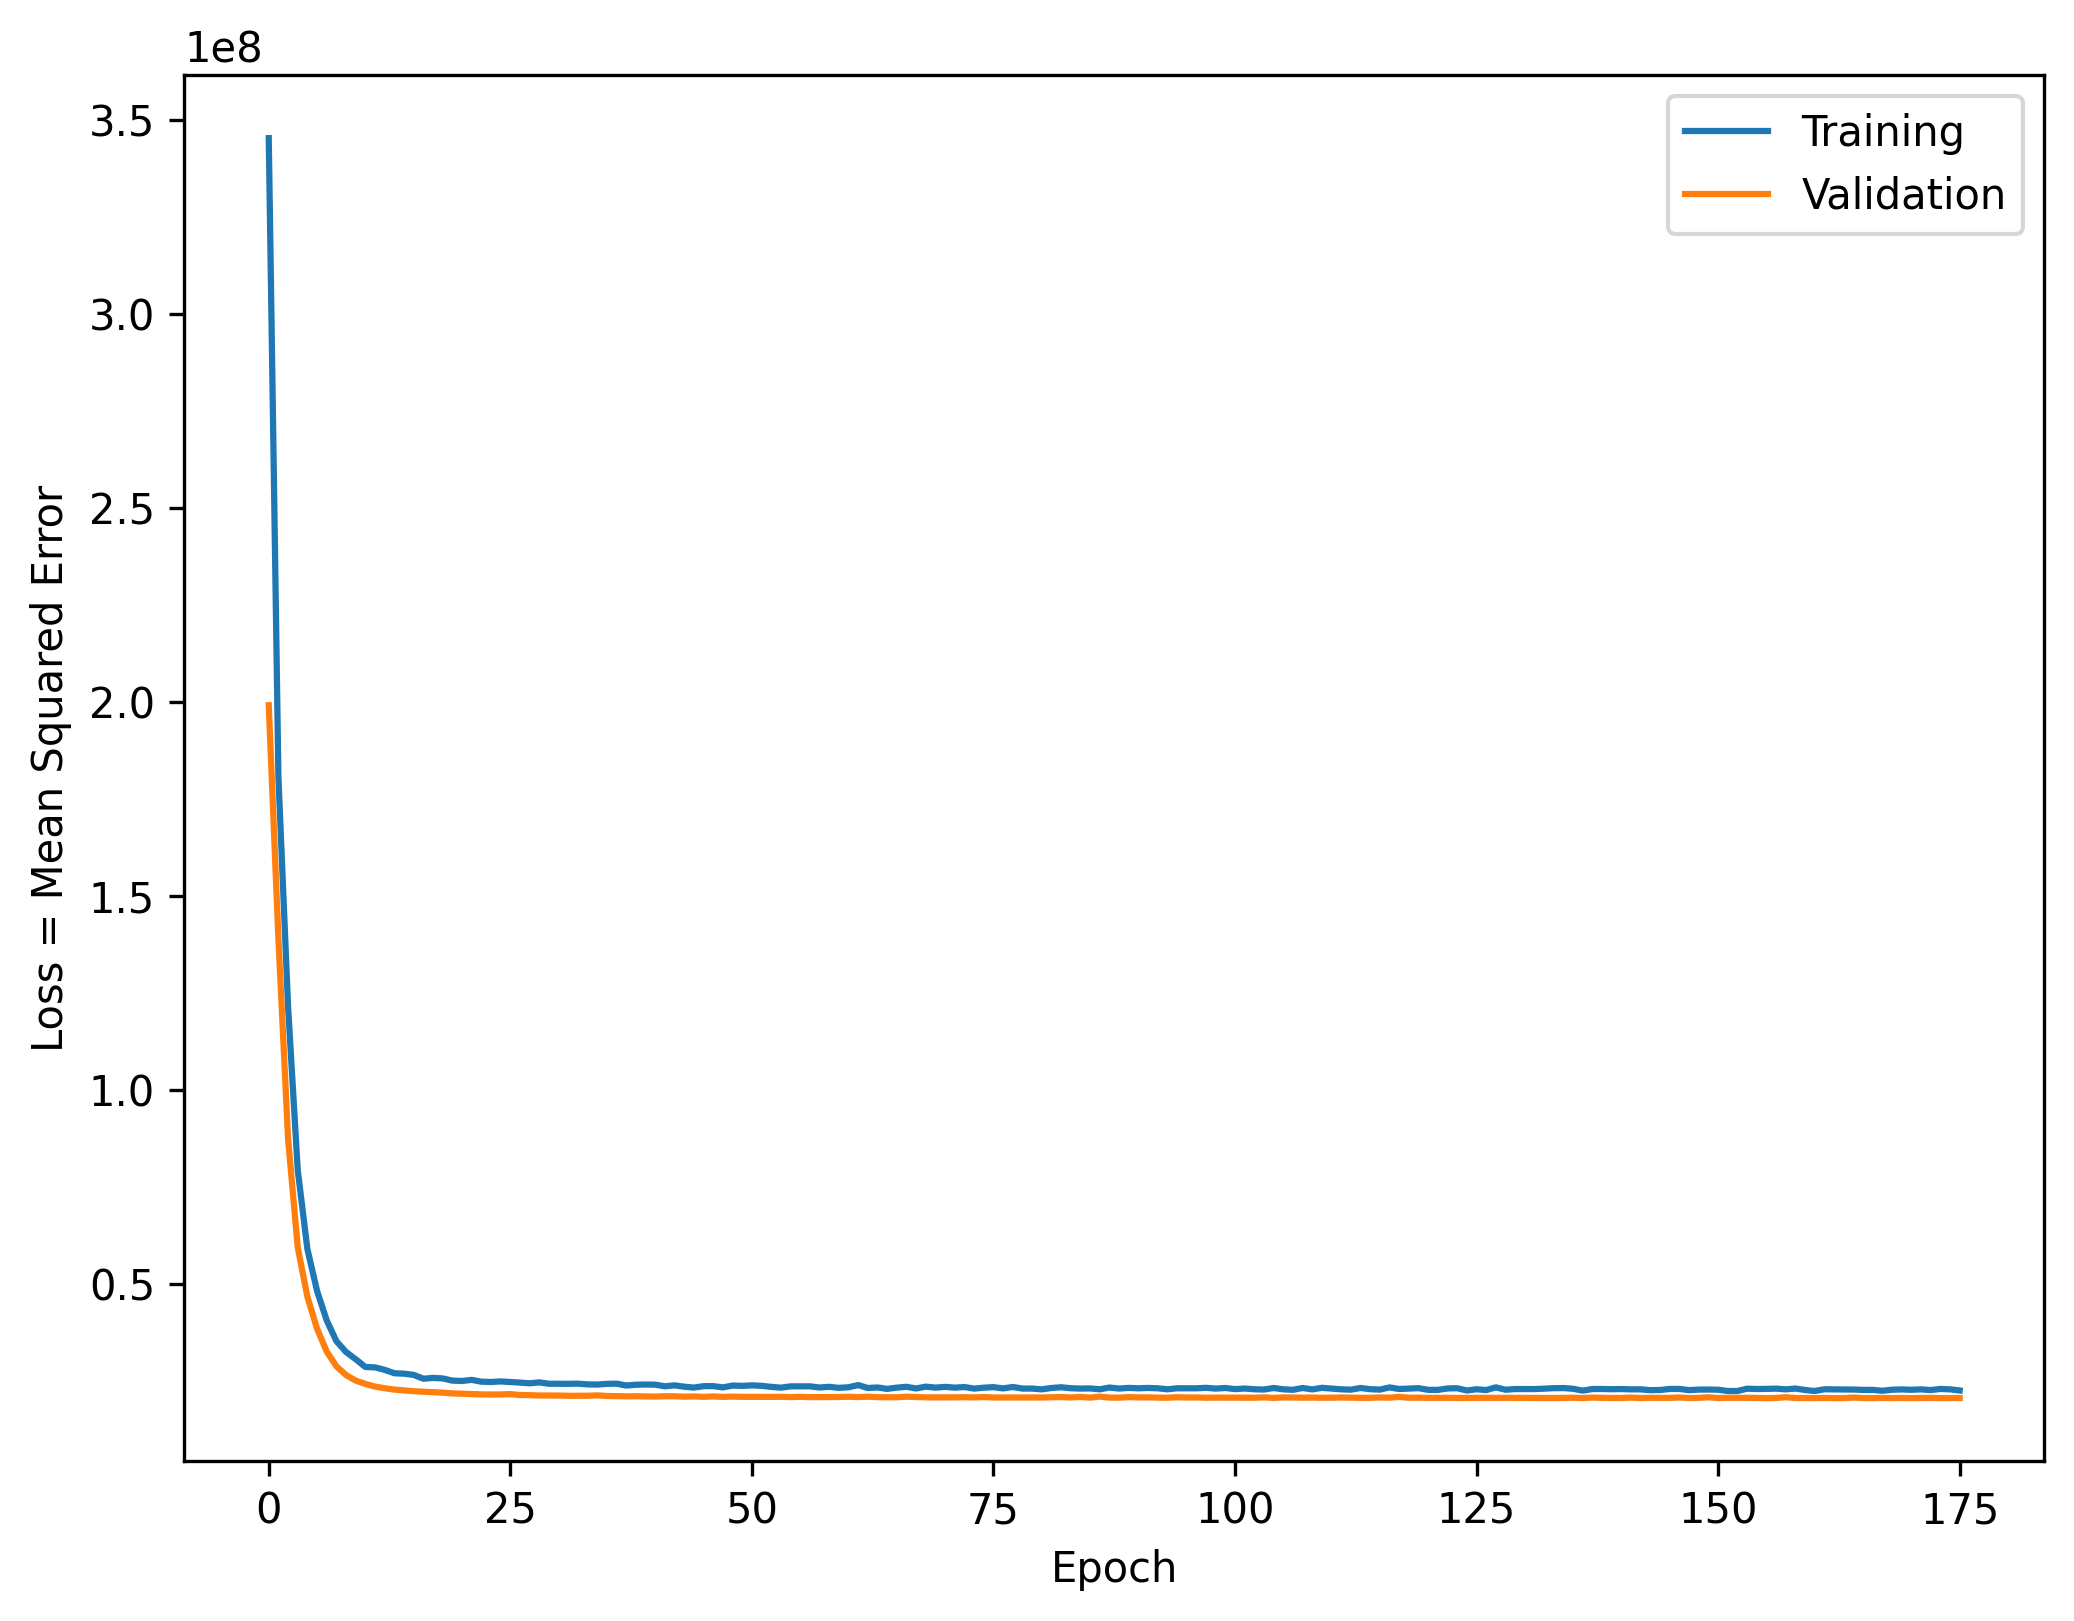

In [76]:

# the history of the fitting.
history_df = pd.DataFrame(history.history)

# use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)
# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.savefig('ANNplot.png', dpi=300)
# Show the plot.
plt.show()

### CNN Model 2: Reducing the learning rate

In [77]:
# Create an instance of the Adam class.set the learning_rate to 0.001 here.
adam_optimizer = Adam(learning_rate = 0.001)

# add the first hidden layer of the network, which will be a Dense (i.e. fully connected) layer with 64 neurons (i.e. units) 

model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
#apply a 20% dropout rate to this hidden layer, to help prevent overfitting

model.add(Dropout(0.2))
#second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

#create the output layer. This will have 1 unit because we are predicting

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
 dense_10 (Dense)            (None, 64)                128       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)               

In [78]:
# compile the model,

model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

In [79]:


# Define the early stopping criterion; monitor the validation Loss, a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model. 
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 3s 2ms/step - loss: 33401064.0000 - mean_squared_error: 33401064.0000 - val_loss: 25214972.0000 - val_mean_squared_error: 25214972.0000
Epoch 2/200
1125/1125 [==============================] - 2s 1ms/step - loss: 25927176.0000 - mean_squared_error: 25927176.0000 - val_loss: 20819766.0000 - val_mean_squared_error: 20819766.0000
Epoch 3/200
1125/1125 [==============================] - 2s 1ms/step - loss: 25529524.0000 - mean_squared_error: 25529524.0000 - val_loss: 30038004.0000 - val_mean_squared_error: 30038004.0000
Epoch 4/200
1125/1125 [==============================] - 2s 1ms/step - loss: 25330726.0000 - mean_squared_error: 25330726.0000 - val_loss: 21496272.0000 - val_mean_squared_error: 21496272.0000
Epoch 5/200
1125/1125 [==============================] - 2s 1ms/step - loss: 25210322.0000 - mean_squared_error: 25210322.0000 - val_loss: 30675082.0000 - val_mean_squared_error: 30675082.0000
Epoch 6/200
1125/1125 [============

313/313 [==============================] - 0s 986us/step


(0.0, 175000.0)

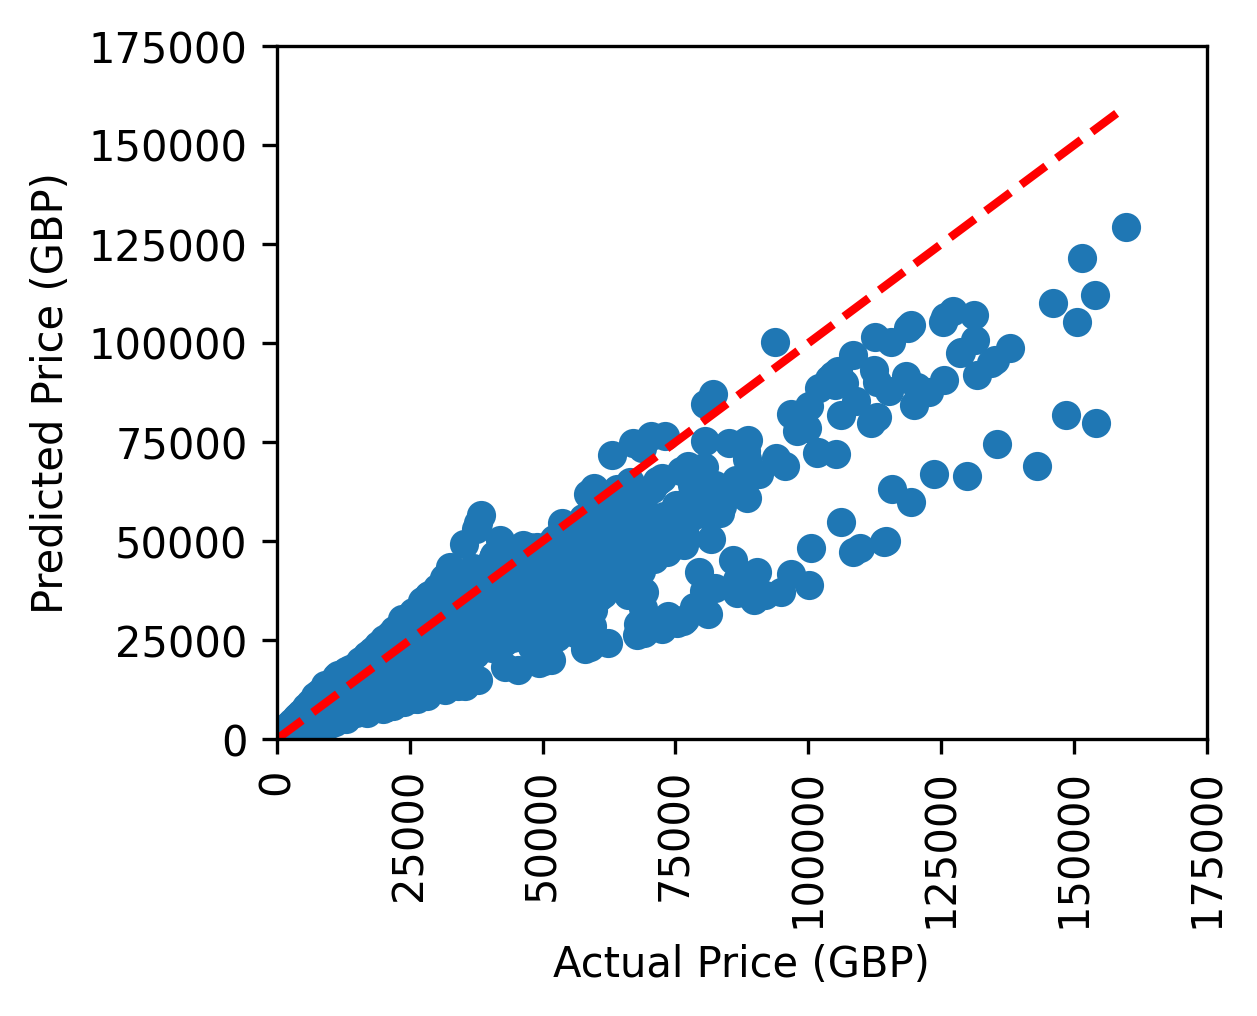

In [80]:
# Predict the model outputs for the testing set.
y_pred = model.predict(x_test_scaled)
#  plot the predicted vs actual price.
# creating a figure
plt.figure(figsize = (4, 3), dpi = 300)
# Create a scatterplot comparing the predicted and actual values of the output variable.
plt.scatter(y_test, y_pred)

# Add a straight diagonal line to the plot.
# the data points should lie along this line if model is performing well: meaning predicted values are equal to actual

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
# Limit the range of values on both axes
plt.xticks(rotation = 'vertical', ha = 'center')
plt.savefig('ANNModel2.png', dpi=300)
plt.xlim(0, 175000)
plt.ylim(0, 175000)
# Show the plot

In [81]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

313/313 [==============================] - 0s 1ms/step
Mean Squared Error: 38525787.7160
R-squared: 0.8580


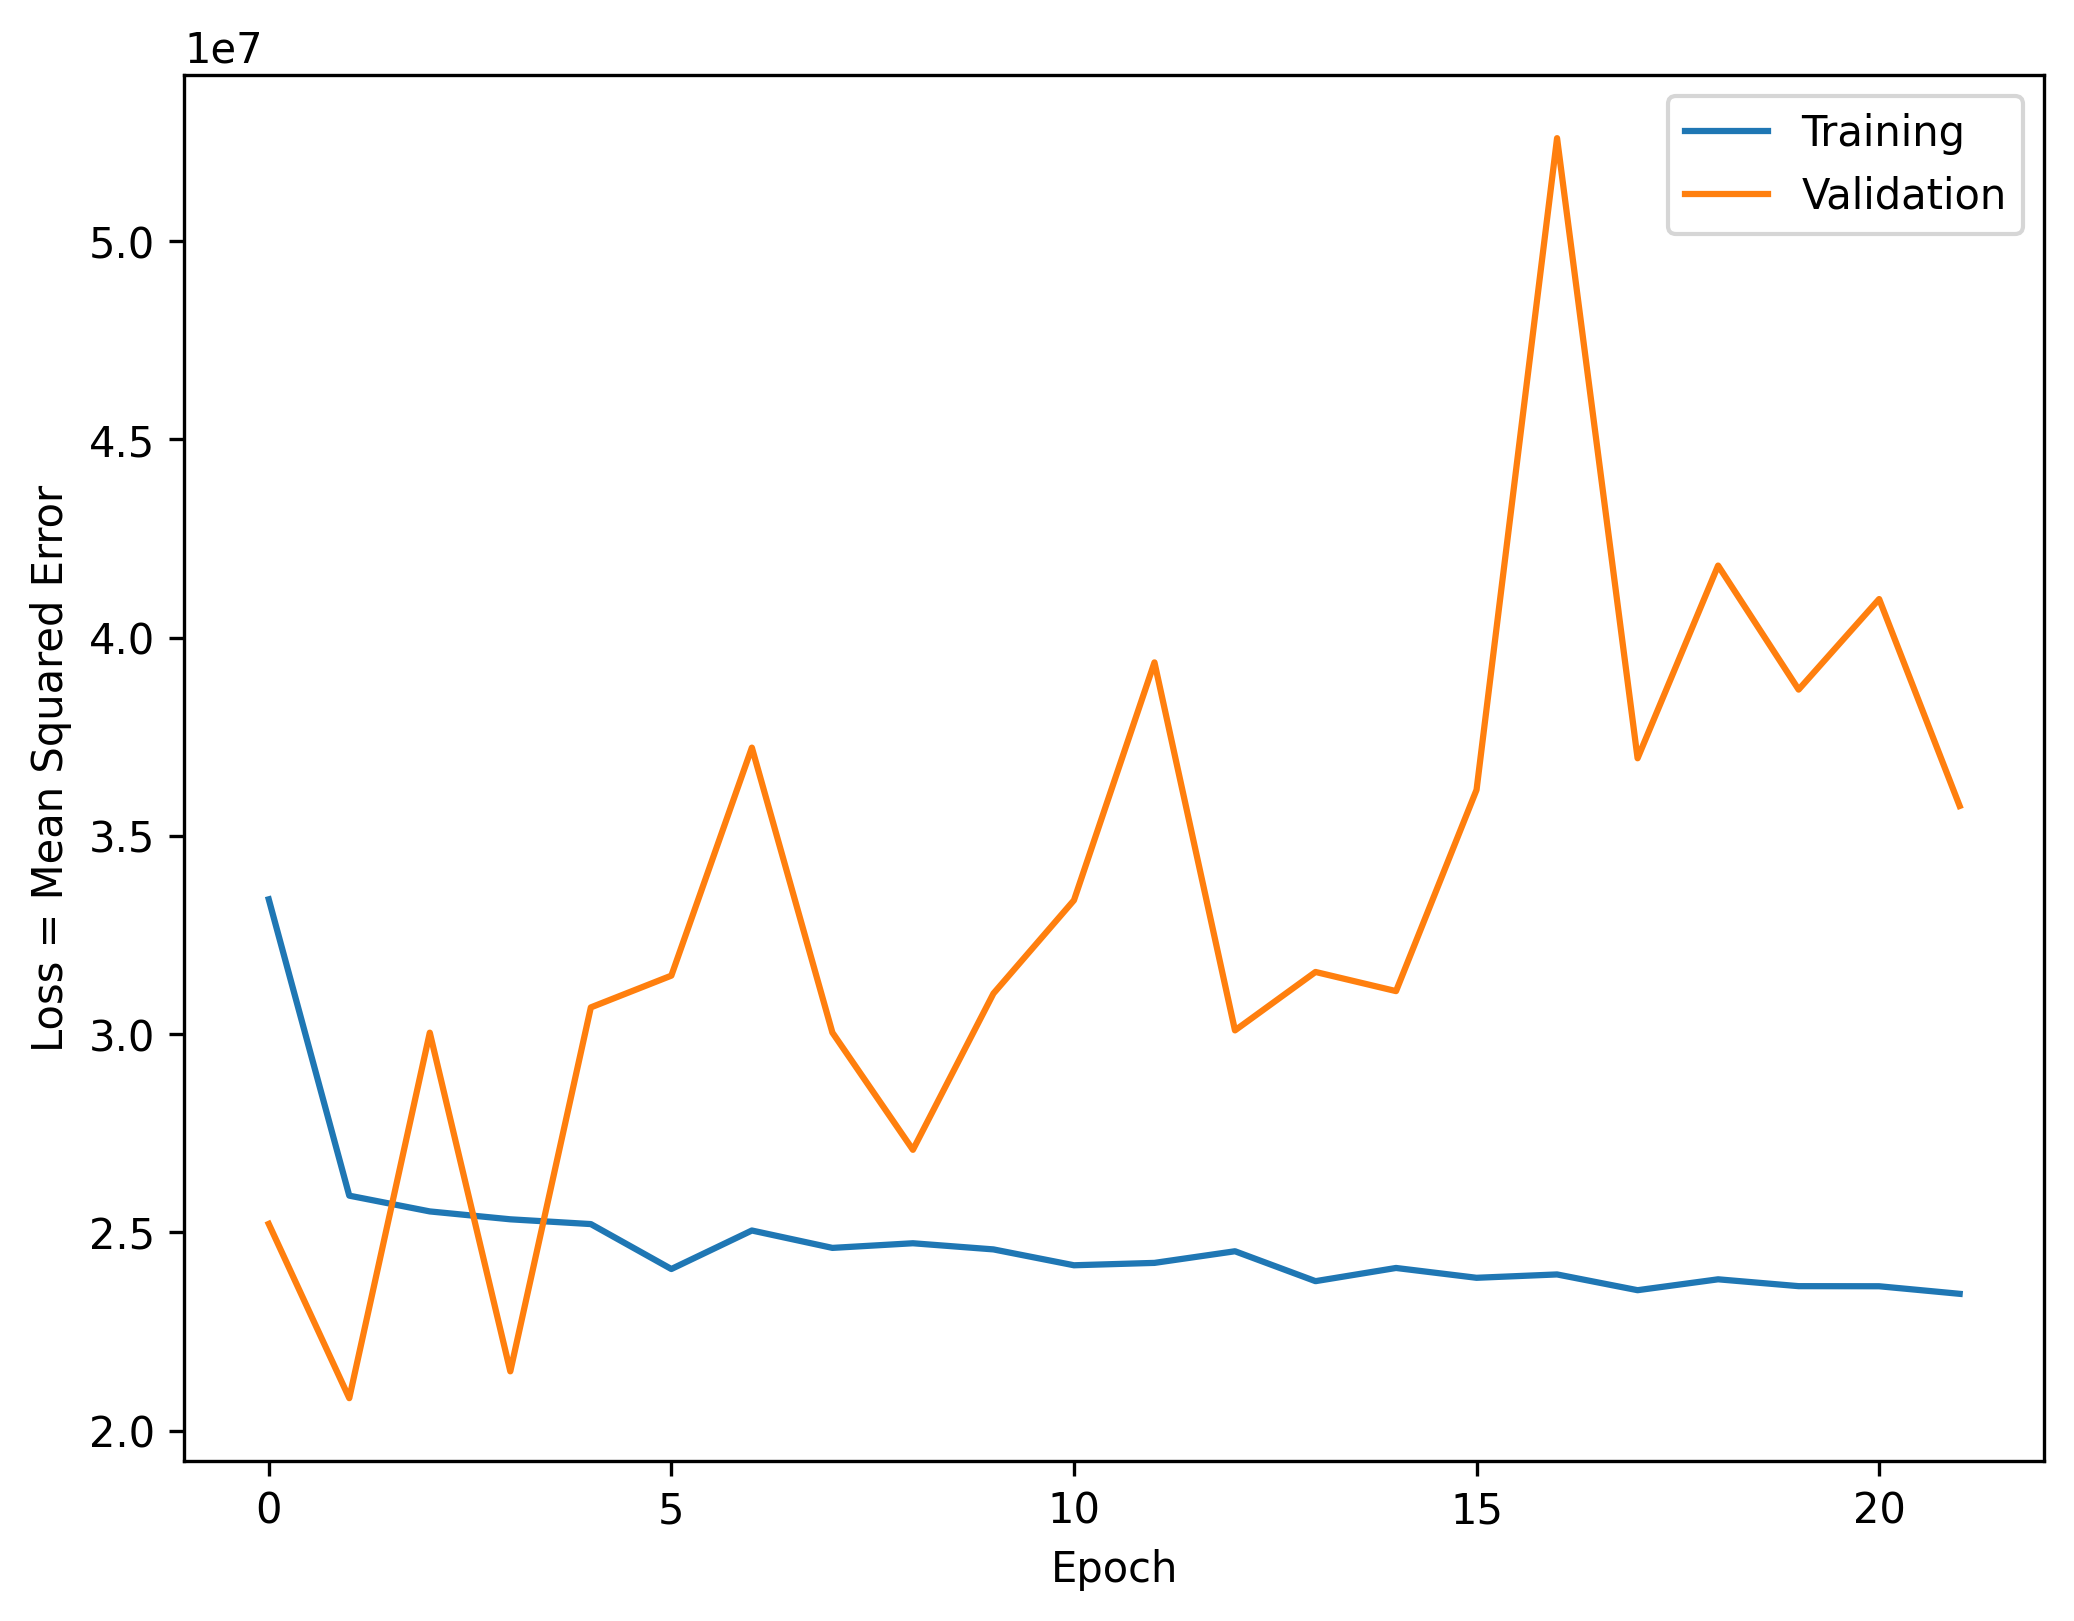

In [82]:

# the history of the fitting.
history_df = pd.DataFrame(history.history)

# use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)
# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.savefig('ANNplot2.png', dpi=300)
# Show the plot.
plt.show()

###  Model 3: Tuning the number of layers

### Hyperparameter tuning

In [83]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()
# Compile the model using the Adam optimizer.
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
# Define the early stopping criterion, with a
# patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                256       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/112

313/313 [==============================] - 0s 1ms/step


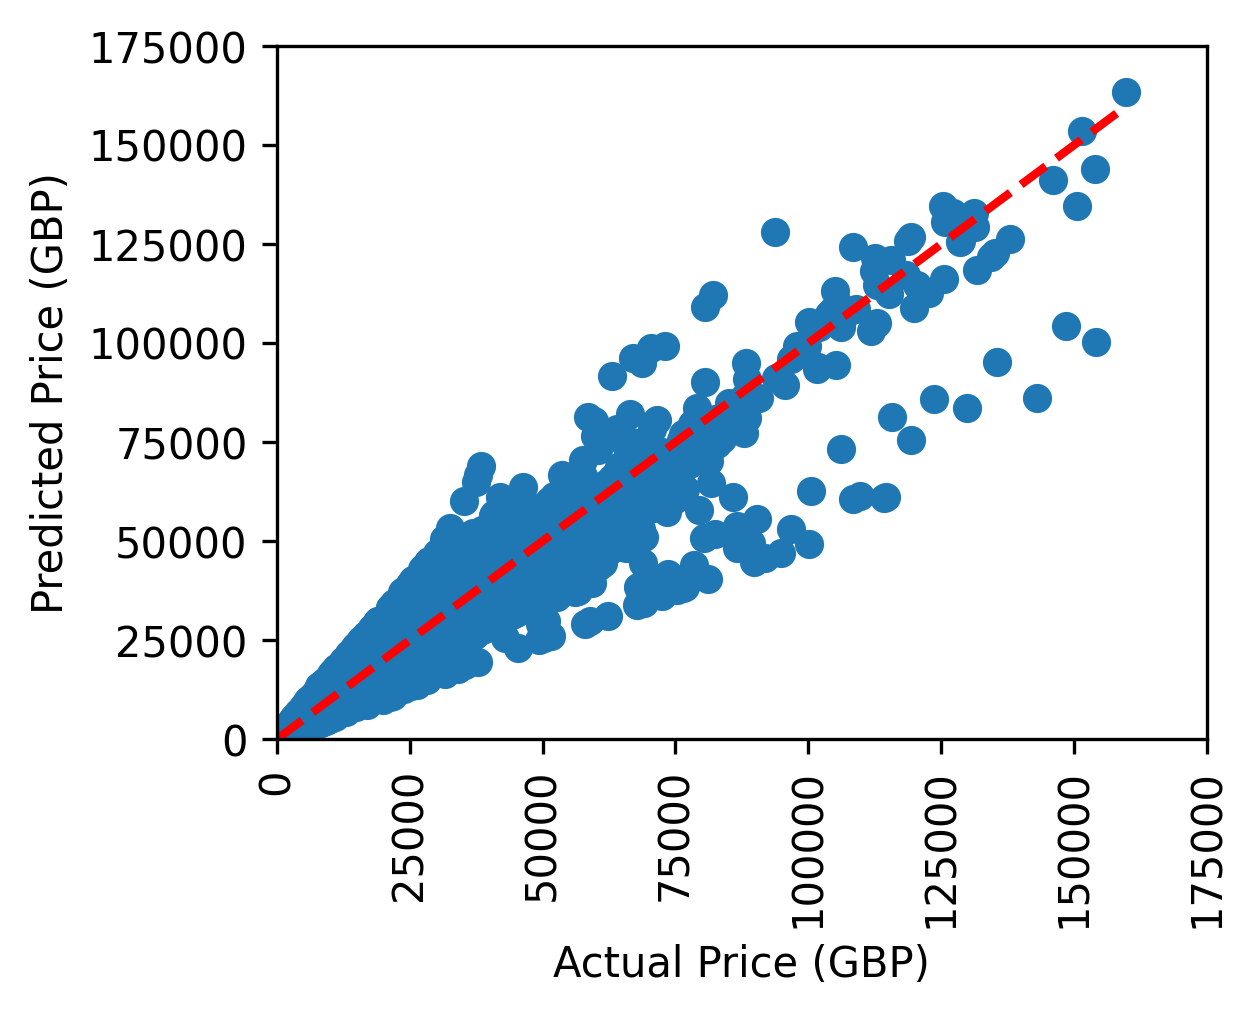

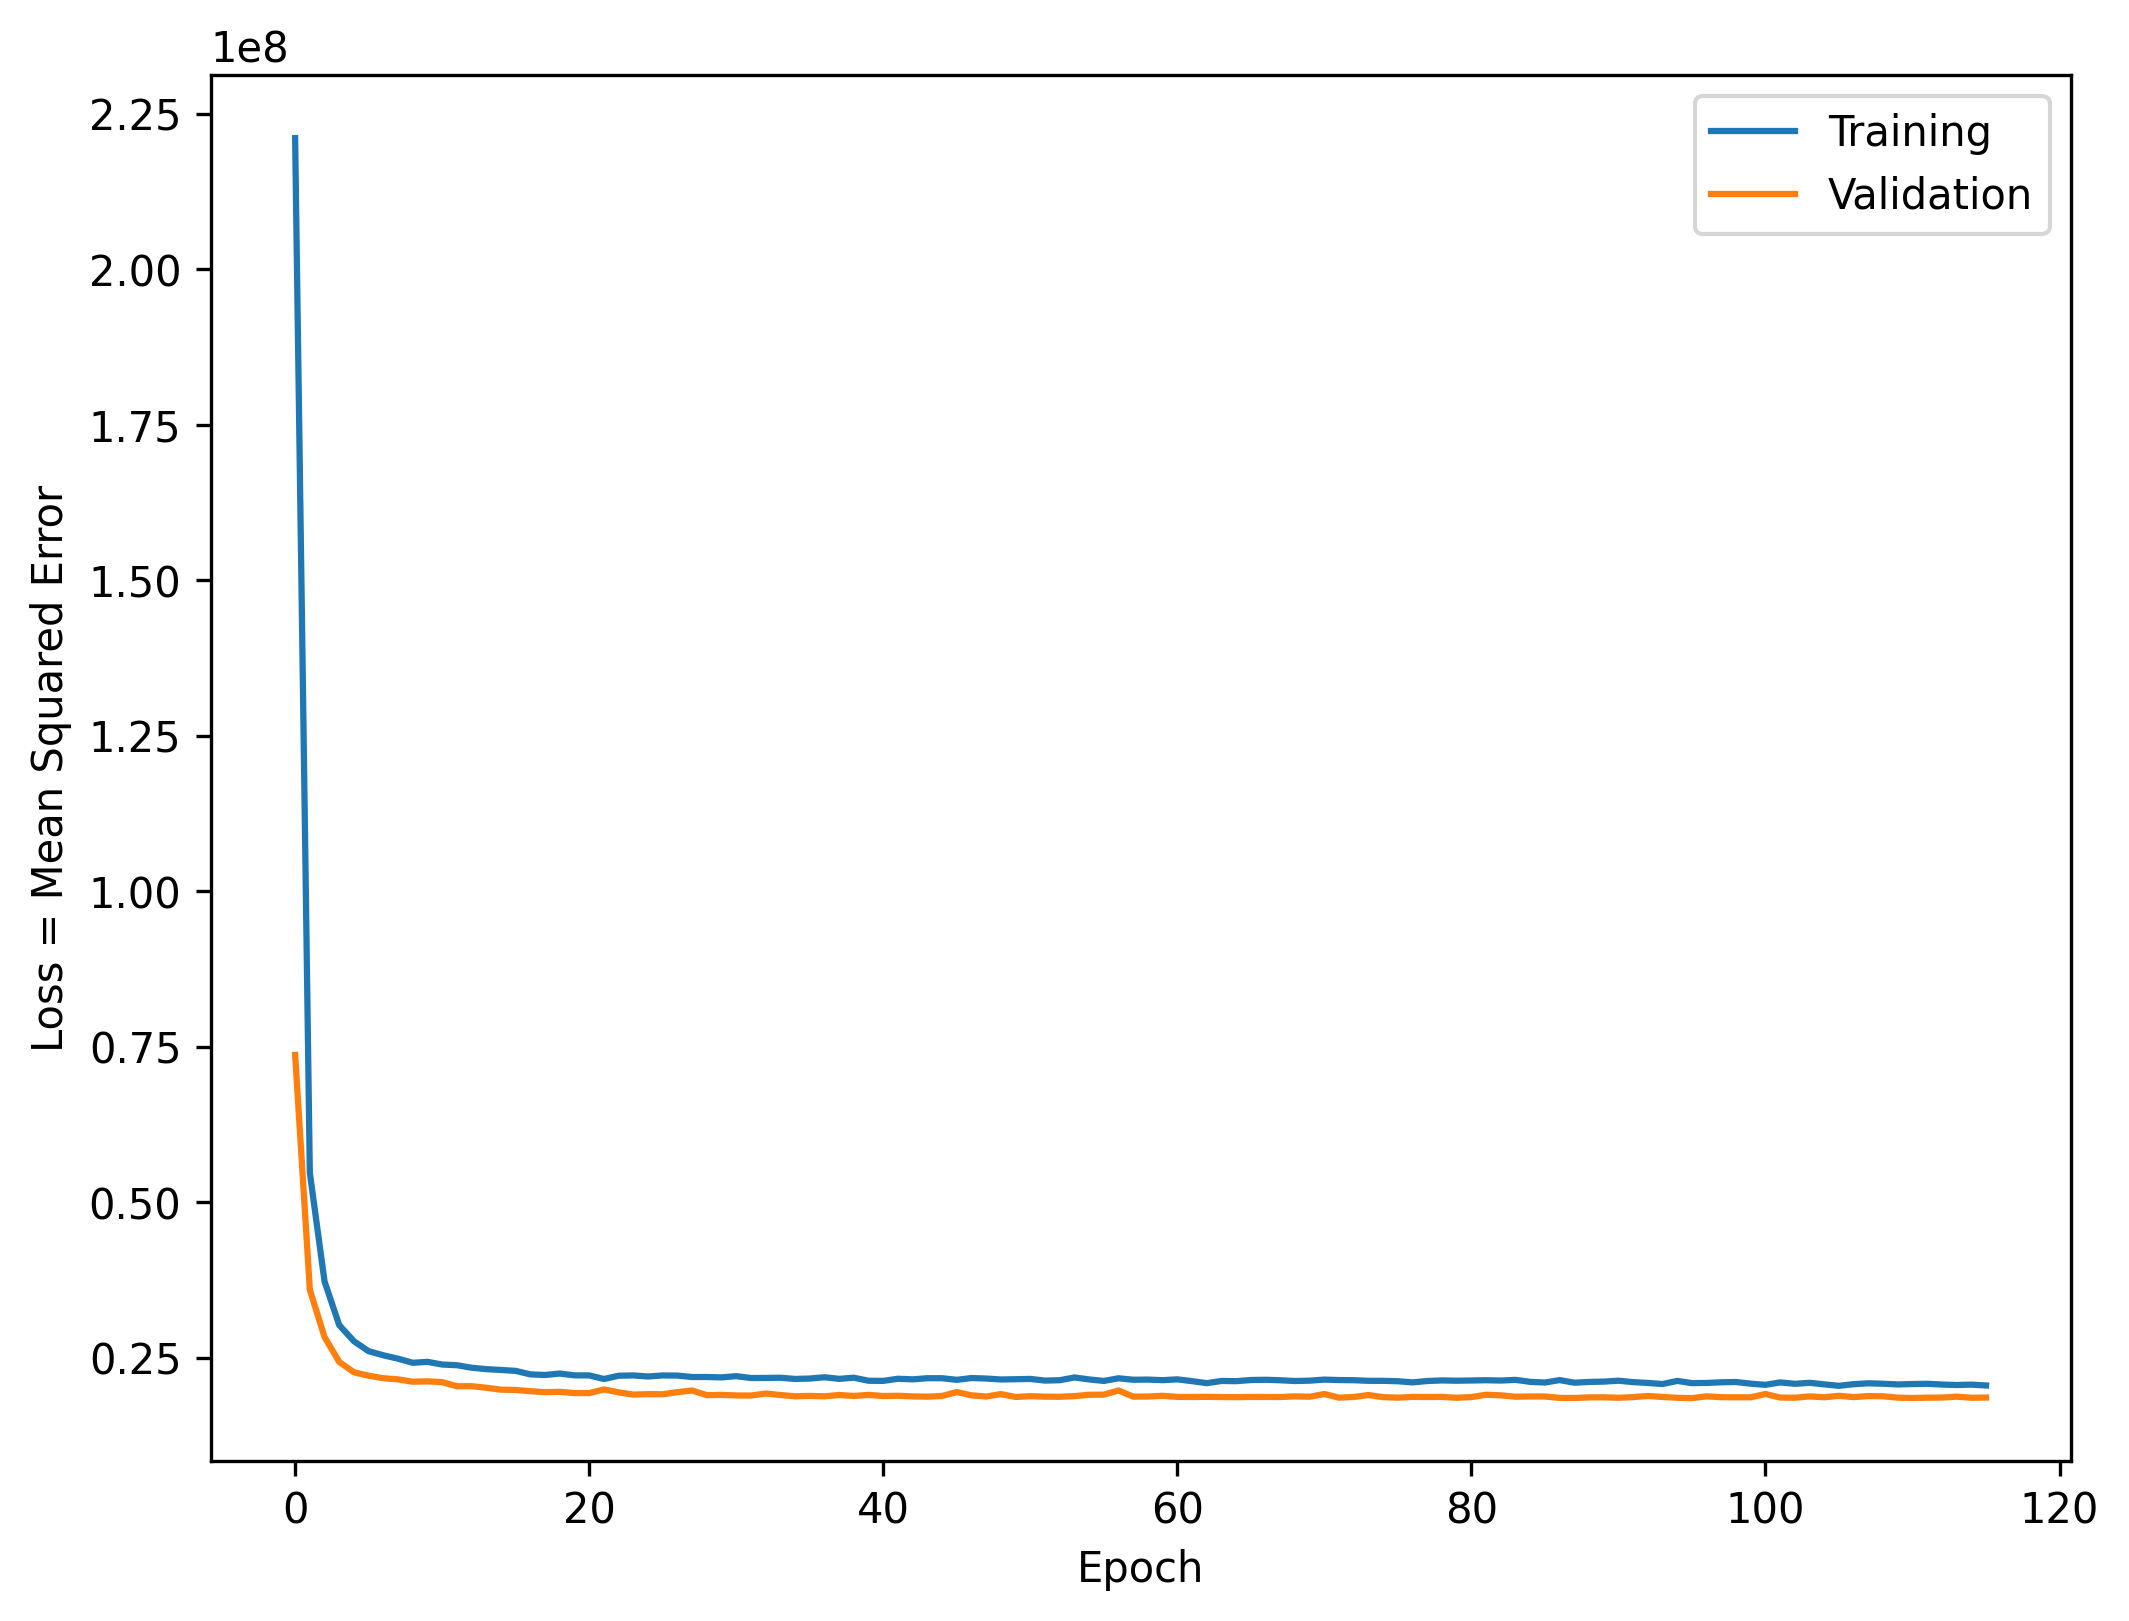

313/313 [==============================] - 0s 1ms/step
Mean Squared Error: 19292559.9993
R-squared: 0.9289


In [84]:
# Predict the model outputs for the testing set
y_pred = model.predict(x_test_scaled)
# Plot the predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(y_test, y_pred)
# Add a diagonal line showing the
# one-to-one relation.
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)

plt.savefig('ANNT1.png', dpi=300)
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
plt.xticks(rotation = 'vertical', ha = 'center')
# Limit the range of values on both axes.
plt.xlim(0, 175000)
plt.ylim(0, 175000)
# Show the plot
plt.show()
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
plt.figure(figsize = (8, 6), dpi = 300)
# Plot the training and validation loss
# versus epoch.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()

plt.savefig('ANNplotT11.png', dpi=300)
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

### ANN Model 4: Add drop out rate of 10%

In [85]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()
# Compile the model with the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
# Define an early stopping criterion with a patience
# of 20.

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                256       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/112

313/313 [==============================] - 0s 932us/step


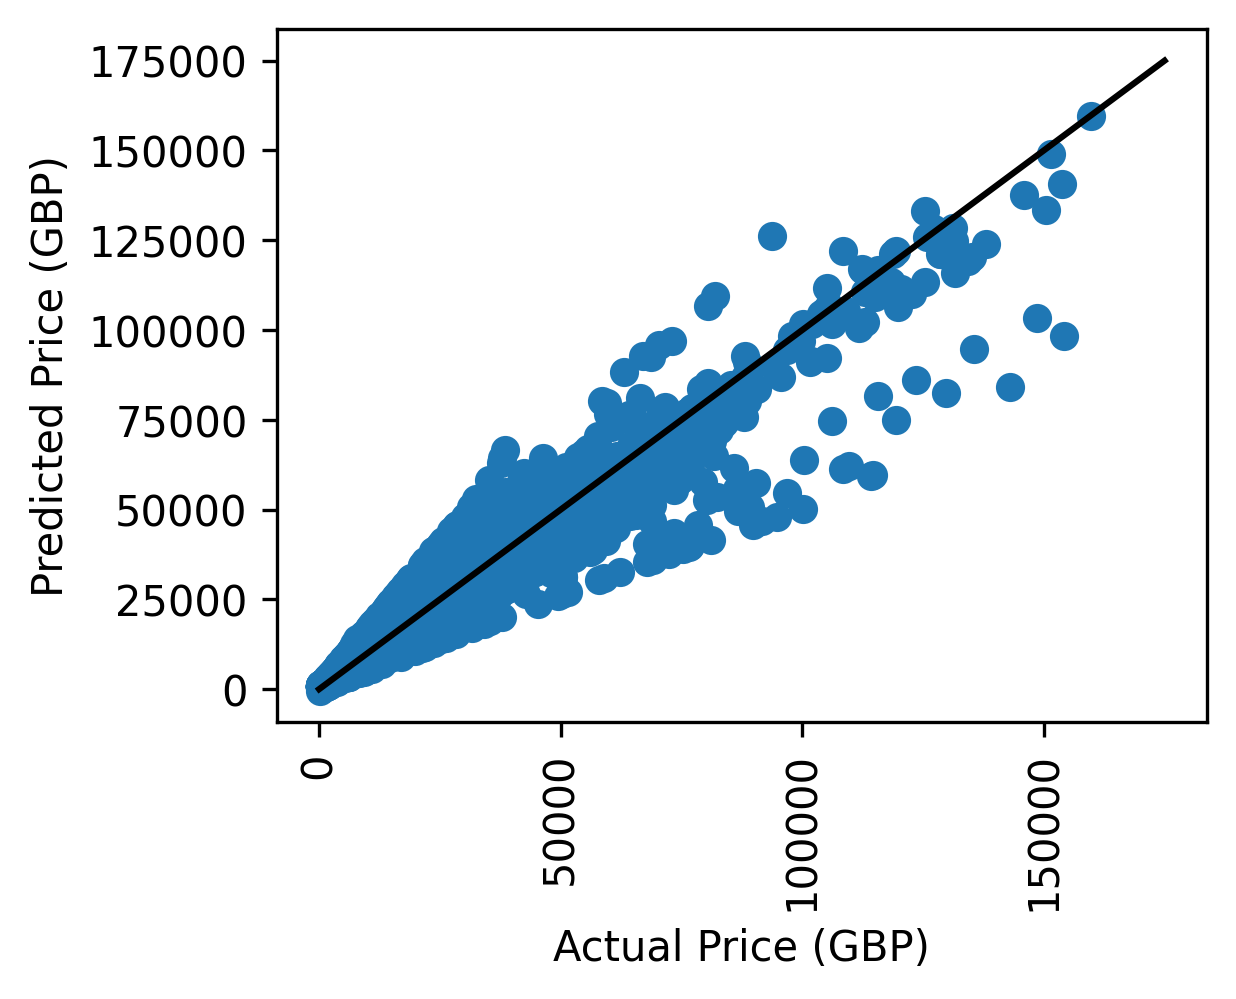

In [86]:
# Predict the model outputs
y_pred = model.predict(x_test_scaled)
# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(y_test, y_pred)
# Plot a diagonal line to show the
# one-to-one relation
plt.plot([0, 175000], [0, 175000], 'k-')
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
plt.xticks(rotation = 'vertical', ha = 'center')
# Show the plot.
plt.show()


313/313 [==============================] - 0s 928us/step


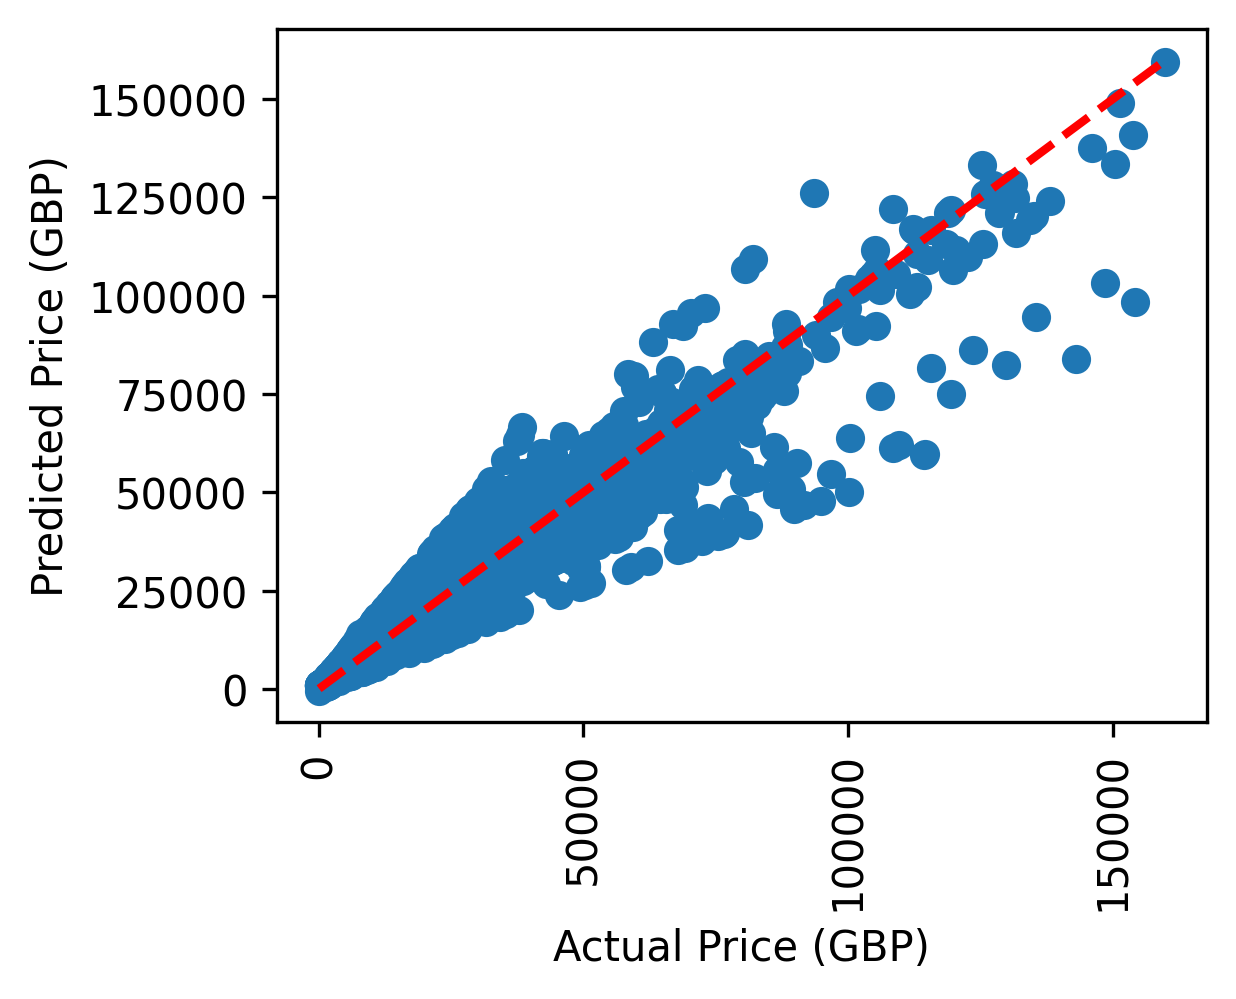

In [87]:
# Predict the model outputs
y_pred = model.predict(x_test_scaled)
# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(y_test, y_pred)
# Plot a diagonal line to show the
# one-to-one relation
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")
plt.xticks(rotation = 'vertical', ha = 'center')
# Show the plot.
plt.show()

Text(0, 0.5, 'Loss = Mean Squared Error')

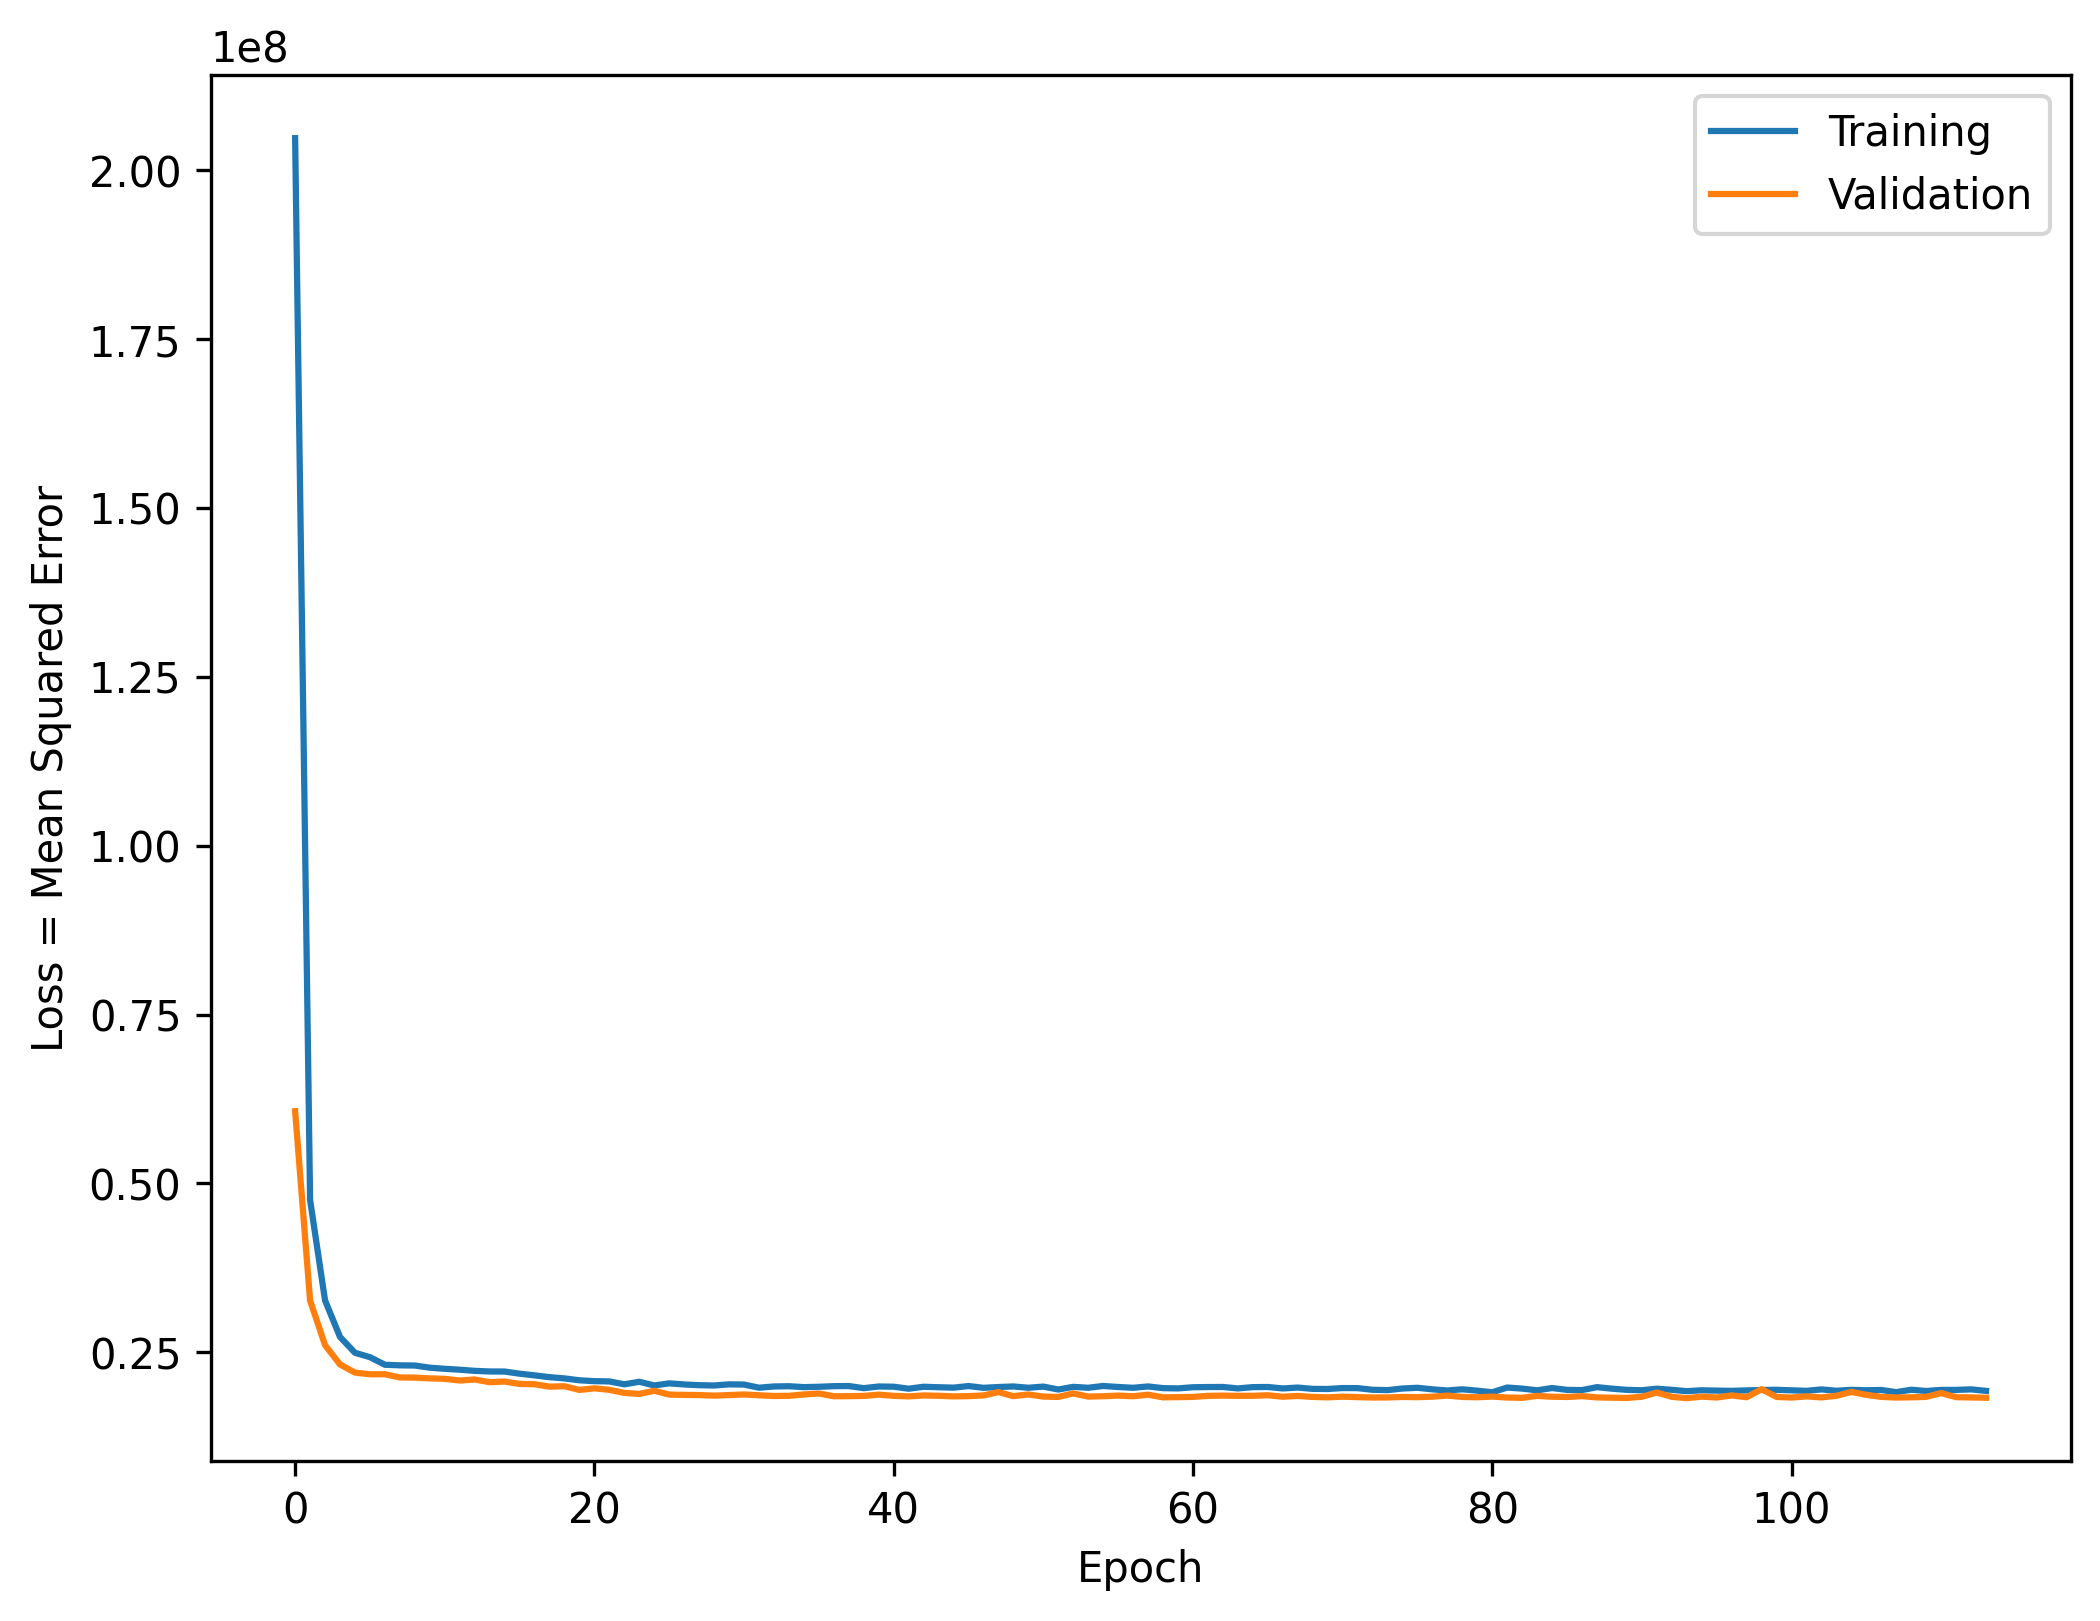

In [88]:


history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")



In [89]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


313/313 [==============================] - 0s 944us/step
Mean Squared Error: 19029016.9286
R-squared: 0.9299


### Adding Categorical Variables to the prediction

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:

# Preprocess categorical variables
label_encoders = {}
for cat_col in ['Manufacturer', 'Fuel type', 'Model']:
    le = LabelEncoder()
    df[cat_col] = le.fit_transform(df[cat_col])
    label_encoders[cat_col] = le

# Split the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['Mileage', 'Year of manufacture', 'Engine size']] = scaler.fit_transform(X_train[['Mileage', 'Year of manufacture', 'Engine size']])
X_val[['Mileage', 'Year of manufacture', 'Engine size']] = scaler.transform(X_val[['Mileage', 'Year of manufacture', 'Engine size']])



In [62]:


# Compile the model with the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regression task, so using linear activation

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping])



Epoch 1/200
1250/1250 [==============================] - 2s 2ms/step - loss: 281235744.0000 - mae: 10087.3164 - val_loss: 150462544.0000 - val_mae: 7017.8926
Epoch 2/200
1250/1250 [==============================] - 2s 1ms/step - loss: 84031496.0000 - mae: 4882.6006 - val_loss: 53436868.0000 - val_mae: 3896.8584
Epoch 3/200
1250/1250 [==============================] - 2s 2ms/step - loss: 42244132.0000 - mae: 3541.5725 - val_loss: 39296296.0000 - val_mae: 3281.6470
Epoch 4/200
1250/1250 [==============================] - 2s 1ms/step - loss: 34714348.0000 - mae: 3253.0803 - val_loss: 35382608.0000 - val_mae: 3192.1799
Epoch 5/200
1250/1250 [==============================] - 2s 1ms/step - loss: 32172942.0000 - mae: 3180.8811 - val_loss: 33204342.0000 - val_mae: 3149.5530
Epoch 6/200
1250/1250 [==============================] - 2s 1ms/step - loss: 30361944.0000 - mae: 3117.9602 - val_loss: 31598042.0000 - val_mae: 3102.0186
Epoch 7/200
1250/1250 [==============================] - 2s 1ms/ste

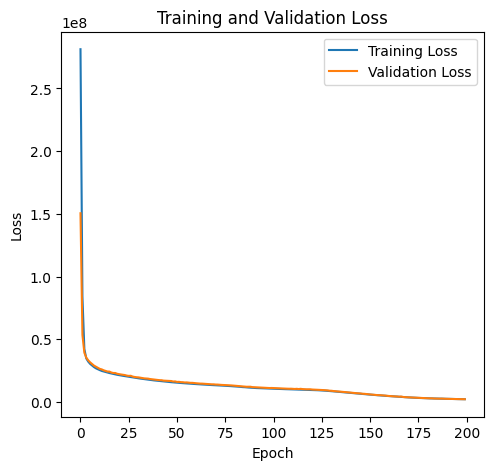

In [63]:
# Plot training and validation losses versus epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()




313/313 [==============================] - 0s 840us/step


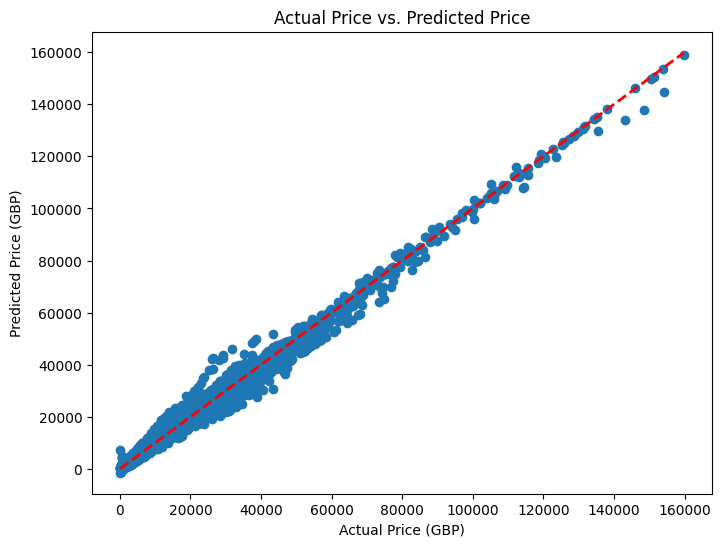

In [64]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)

# Plot actual price versus predicted price
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()



In [65]:
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 2198945.5261
R-squared: 0.9919


### Using the k-Means clustering algorithm to identify clusters in the car sales data

### Price v Mileage

In [103]:
# Extract the input features
feature_names = ["Mileage", "Price"]
x = df[feature_names]

In [104]:
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x. This will find the mean and standard
# deviation of each column in x.
scale.fit(x)
# Now we can apply the standard scaler transformation
# to re-scale each column in x.
x_scaled = scale.transform(x)

In [105]:
# Import the k-Means model
from sklearn.cluster import KMeans
# Create a list to record the inertia
# for each value of k.
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through the possible values of k
for k in k_range:
# Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
# Fit the model to the scaled data
    kmeans.fit(x_scaled)
# Record the inertia
    inertia.append(kmeans.inertia_)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

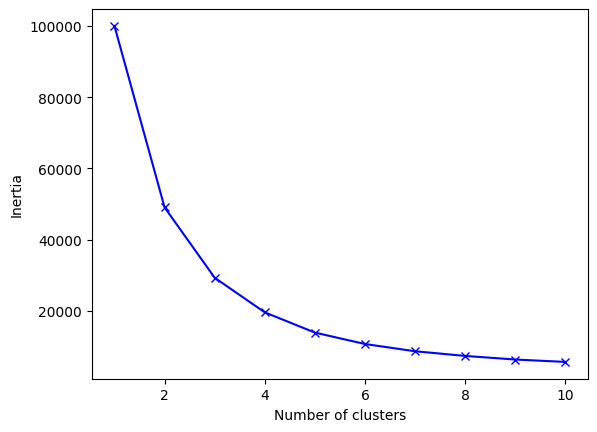

In [106]:
# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.savefig('KMeans.png', dpi=300)
plt.show()


In [107]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)

In [108]:
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6881
Silhouette Coefficient: 0.4781


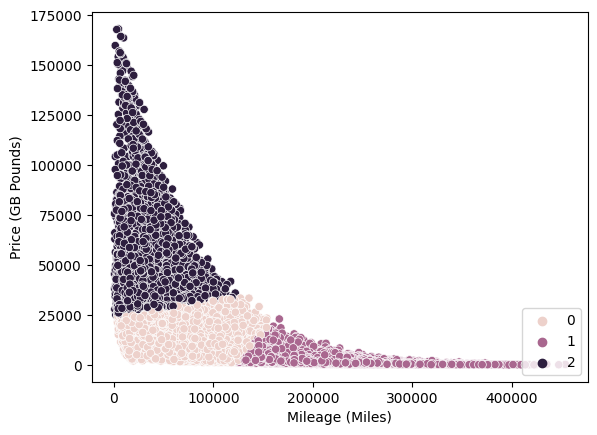

In [110]:
# Visualise the clusters in a scatter plot

sns.scatterplot(data = df, x = "Mileage", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (GB Pounds)")
# Show the figure
plt.savefig('KMeansplot.png', dpi=300)
plt.show()

### K-Means Clustering: Year of manufacture v Price

In [111]:
# Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = df[feature_names]
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [112]:
# Create a list to record the inertia
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through possible values of k
for k in k_range:
# Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
# Fit the model to the scaled data
    kmeans.fit(x_scaled)
# Record the inertia
    inertia.append(kmeans.inertia_)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

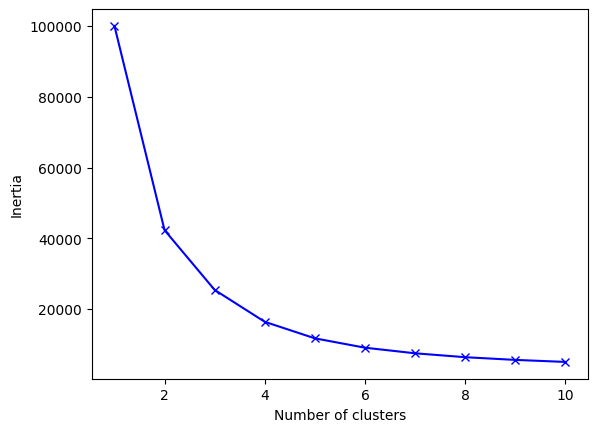

In [113]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.savefig('KMeansYoM.png', dpi=300)
# Show the plot
plt.show()

In [114]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [115]:
# Apply the evaluation metrics.
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6865
Silhouette Coefficient: 0.5140


Text(12.097222222222216, 0.5, 'Price (GB Pounds)')

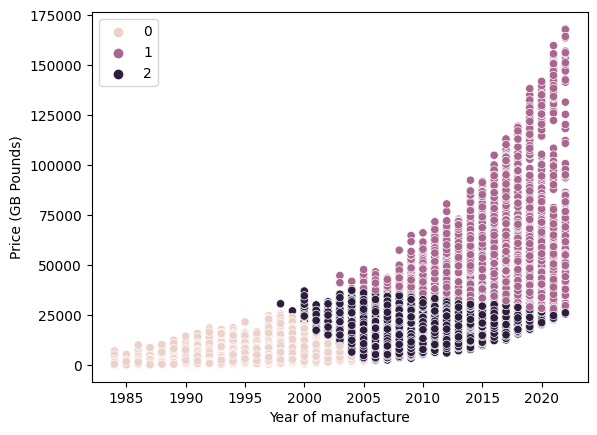

In [116]:
# Visualise the clusters

sns.scatterplot(data = df, x = "Year of manufacture", y = "Price",hue = cluster_labels_pred)

plt.savefig('KMeansYoMplot1.png', dpi=300)
# Label both axes
plt.xlabel("Year of manufacture")
plt.ylabel("Price (GB Pounds)")

# Show the plot 

### K-Means Clustering: Engine size v Price

In [117]:
# Extract the input features
feature_names = ["Engine size", "Price"]
x = df[feature_names]
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [118]:
# Create a list to record the inertia
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through possible values of k
for k in k_range:
# Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
# Fit the model to the scaled data
    kmeans.fit(x_scaled)
# Record the inertia
    inertia.append(kmeans.inertia_)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

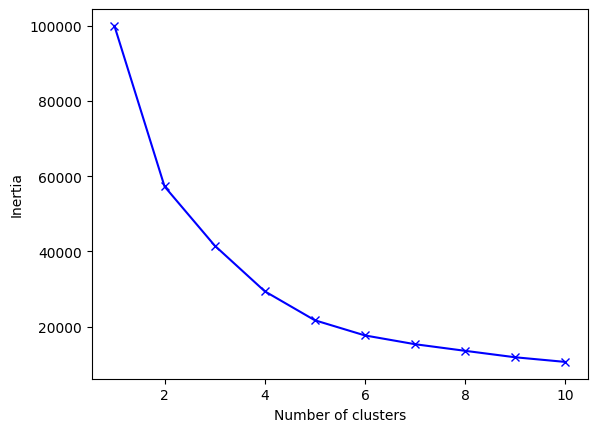

In [119]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.savefig('KMeansEngine.png', dpi=300)
# Show the plot
plt.show()

In [120]:
# Fit the final k-Means model with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
# Apply the evaluation metrics.
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))     #Davies Bouldin Index: 0.9419 2
                                                      # Silhouette Coefficient: 0.6182 
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.8958
Silhouette Coefficient: 0.4752


Text(12.097222222222216, 0.5, 'Price (GBP)')

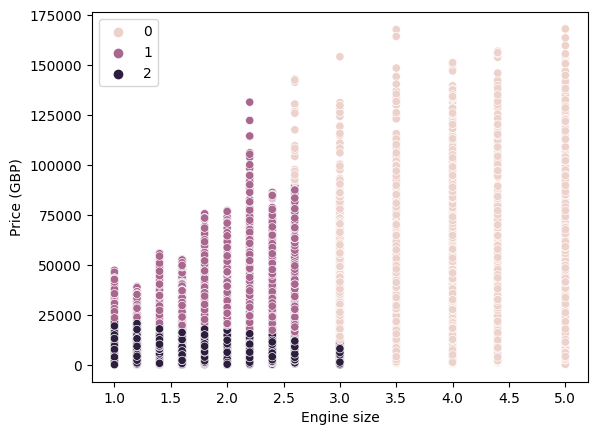

In [122]:
# Visualise the clusters
sns.scatterplot(data = df, x = "Engine size", y = "Price",hue = cluster_labels_pred)
plt.savefig('KMeansEngineplot.png', dpi=300)
# Label both axes
plt.xlabel("Engine size")
plt.ylabel("Price (GBP)")
# Show the plot

### DBSCAN - Price versus Year of manufacture

In [123]:
# Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = df[feature_names]

In [124]:
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [125]:
# Create an instance of the DBSCAN class, and
# set the eps and min_samples parameters.
dbscan = DBSCAN(eps=0.2, min_samples=3)
# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

In [126]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 1.4952
Silhouette Coefficient: 0.6763


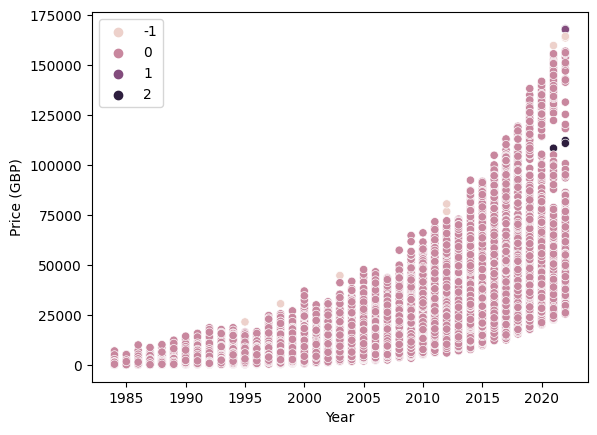

In [127]:
sns.scatterplot(data = df, x = "Year of manufacture", y = "Price", hue =dbscan_labels_pred)

# Label both axes
plt.xlabel("Year")
plt.ylabel("Price (GBP)")

plt.savefig('DBScanYoM.png', dpi=200)

# Show the plot
plt.show()

#From this plot we see that the DBSCAN has identified three distinct clusters, labelled from 0 to 2.
#Data points labelled as -1 have been flagged as noise and therefore are not assigned
#to a cluster.



### DBSCAN - Price versus Mileage

In [128]:
# Extract the input features
feature_names = ["Mileage", "Price"]
x = df[feature_names]

In [129]:
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create an instance of the DBSCAN class, and
# set the eps and min_samples parameters.
dbscan = DBSCAN(eps=0.2, min_samples=3)
# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))


Davies Bouldin Index: 0.1570
Silhouette Coefficient: 0.8178


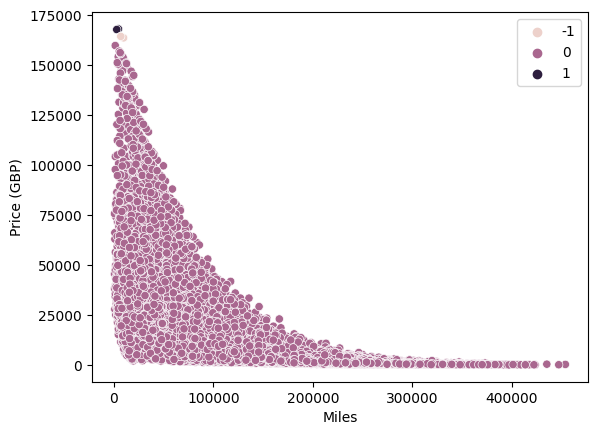

In [130]:
sns.scatterplot(data = df, x = "Mileage", y = "Price", hue =dbscan_labels_pred)

# Label both axes
plt.xlabel("Miles")
plt.ylabel("Price (GBP)")

plt.savefig('DBScanMileage.png', dpi=400)

# Show the plot
plt.show()

#From this plot we see that the DBSCAN has identified two distinct clusters, labelled from 0 to 1.
#Be aware that data points labelled as -1 have been flagged as noise and therefore are not assigned
#to a cluster.


### DBSCAN - Price versus Engine size

In [131]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [132]:
# Extract the input features
feature_names = ["Engine size", "Price"]
x = df[feature_names]

In [133]:
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create an instance of the DBSCAN class, and
# set the eps and min_samples parameters.
dbscan = DBSCAN(eps=0.2, min_samples=3)
# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 2.6414
Silhouette Coefficient: 0.0608


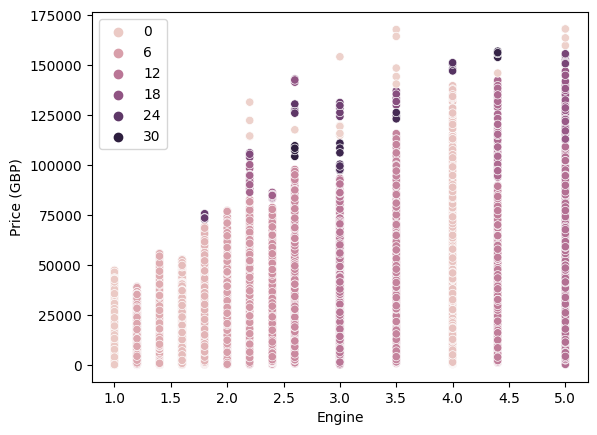

In [134]:
sns.scatterplot(data = df, x = "Engine size", y = "Price", hue =dbscan_labels_pred)

# Label both axes
plt.xlabel("Engine")
plt.ylabel("Price (GBP)")

plt.savefig('DBScanEngine.png', dpi= 300)

# Show the plot
plt.show()

#From this plot we see that the DBSCAN has identified two distinct clusters, labelled from 0 to 1.
#Be aware that data points labelled as -1 have been flagged as noise and therefore are not assigned
#to a cluster.

### DBSCAN - Price versus Year of Manufacture

In [135]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [136]:
df = pd.read_csv("car_sales_data.csv") #loading file

In [137]:
# Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = df[feature_names]

In [138]:
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create an instance of the DBSCAN class, and
# set the eps and min_samples parameters.
dbscan = DBSCAN(eps=0.2, min_samples=3)
# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 1.4952
Silhouette Coefficient: 0.6763


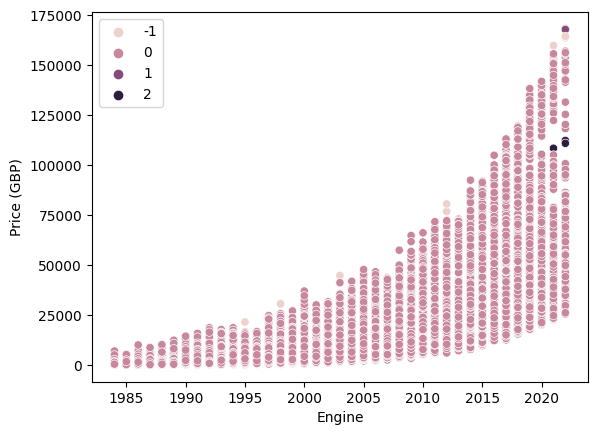

In [139]:
sns.scatterplot(data = df, x = "Year of manufacture", y = "Price", hue =dbscan_labels_pred)

# Label both axes
plt.xlabel("Engine")
plt.ylabel("Price (GBP)")

plt.savefig('DBScanYearman.png', dpi= 300)

# Show the plot
plt.show()

#From this plot we see that the DBSCAN has identified two distinct clusters, labelled from 0 to 1.
#Be aware that data points labelled as -1 have been flagged as noise and therefore are not assigned